# Modelos de predicción ARIMA

### Modelos AR y MA

En las series temporales, los modelos de autorregresión (AR) y medias móviles (MA) proporcionan una simple descripción de un proceso en base a dos factores: uno para la autoregresión y el otro para la media móvil. La parte AR implica la regresión de la variable en sus propios valores retrasados. La idea es que el valor del período de tiempo anterior pueda ayudarnos a predecir el valor del período de tiempo actual. La parte MA implica modelar el término de error como una combinación lineal de términos de error que ocurren al mismo paso de tiempo y en varios momentos en el pasado.

### Modelos autorregresivos

El modelo autorregresivo (AR) se da cuando se puede predecir el valor actual de una serie temporal a partir del uso de valores anteriores de la misma serie. Es una regresión usando la propia serie, pero desfasada un periodo, llamado retraso o lag. El valor actual es un promedio ponderado de sus valores pasados. Tanto el ``t-1`` como el ``t-2`` son retrasos (lags) de la serie temporal ``y``. El término de error (ruido) se representa como ``e``. Los valores ``a1`` y ``a2`` son los coeficientes del modelo.

Dependiendo de los retrasos que queramos tener en cuenta, podemos definir diferentes modelos:


Modelo AR(1): $y_{t}$ = $a_{1}$$y_{t-1}$ + $e_{t}$

Modelo AR(2): $y_{t}$ = $a_{1}$$y_{t-1}$ + $a_{2}$$y_{t-2}$ + $e_{t}$

En estos ejemplos, los valores 1 y 2 se corresponden con los retrasos que se tienen en cuenta, que se asocian a la variable ``p``, que nos indicará el orden del modelo AR.


### Modelos de media móvil

La media móvil (MA) es un procedimiento donde el valor actual de una serie temporal (``y``) se define como una combinación lineal de errores pasados. El término de error (ruido) se representa como ``e``. Tanto el ``t-1`` como el ``t-2`` son retrasos del tiempo en los errores.

Modelo MA(1): $y_{t}$ = $m_{1}$$e_{t-1}$ + $e_{t}$

Modleo MA(2): $y_{t}$ = $m_{1}$$e_{t-1}$ + $m_{2}$$e_{t-2}$ + $e_{t}$

En estos ejemplos, los valores 1 y 2 se corresponden con los retrasos que se tienen en cuenta en los errores, que se asocian a la variable ``q``.


### Modelos ARMA

Si combinamos los modelos AR y MA, podemos crear un modelo ARMA, donde la predicción de la serie temporal se hace en base a los valores y errores del pasado.

Modelo ARMA(1,1): $y_{t}$ = $a_{1}$$y_{t-1}$ + $m_{1}$$e_{t-1}$ + $e_{t}$

Para un modelo ARMA(p, q), la variable ``p`` se corresponde con los retrasos del modelo AR, y la variable ``q`` con los del MA.

## Métricas de predicción

Dado que estos modelos son modelos de regresión, podemos utilizar las mismas métricas. En este caso, las más utilziadas son las que hemos visto siempre: MAE, MSE y RMSE (siendo esta última prefereida sobre las otras por su relación natural con las unidades de la variable bajo estudio).

Sin embargo, existen otras también utilizadas. Veamos las definiciones de todas ellas:

- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): coeficiente de determinación (en econometría, esto puede interpretarse como el porcentaje de varianza explicado por el modelo), $(-\infty, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Error Absoluto Medio (Mean Absolute Error, MAE)](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error): esta es una métrica interpretable porque tiene la misma unidad de medición que la serie inicial, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error, MedAE](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error): de nuevo, se trata de una medida interpretable, pero que es particularmente interesante por su robustez frente a outliers, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Error Cuadrático Medio (Mean Squared Error, MSE)](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): es el más usado de las métricas dado que impone una gran penalización a los mayores errores y viceversa, $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error): prácticamente, es lo mismo que el MSE, salvo que aplicamos una transformación logarítmica. Como resultado, le asignamos mayor importancia a los pequeños errores. Se suele utilizar cuando la serie temporal presenta cierta tendencia exponencial, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- Error Porcentual Absoluto Medio (Mean Absolute Percentage Error, MAPE): básicamente, es lo mimso que el MAE, solo que se calcula de forma porcentual, lo caul le hace especialmente conveniente para explicar la calidad del modelo, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

### Analítica

Una vez ya hemos definido cada modelo y cómo los vamos a medir, podemos pasar a la parte analítica. Para ello, nos basaremos en los datos de ventas de Johnson&Johnson.

En este punto, es recomendable que instales la librería ``pmdarima``, que es una librería que incluye funcionalidades muy interesantes para calcular los modelos ARIMA:

In [1]:
# !pip install pmdarima

In [1]:
# librerías
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

import warnings
# warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv("data/jj.csv", parse_dates=['date'], index_col='date')
print(len(data))
data.tail()

84


,data
date,
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


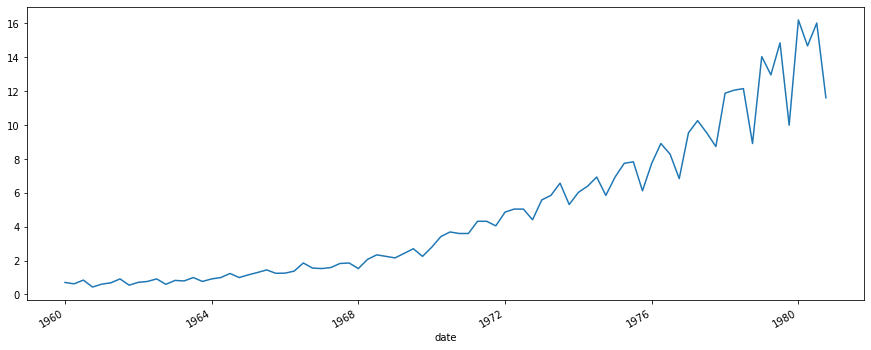

In [44]:
# Representamos los datos:
data['data'].plot(figsize=(15,6));

Como se aprecia en la gráfica, podemos asumir que existe cierta tendencia.

A continuación, representaremos sus gráficas de autocorrelación, donde veremos que se pone de manifiesto esta condición debido a la lentitud con la que decae este parámetro conforme avanzamos en los instantes temporales.

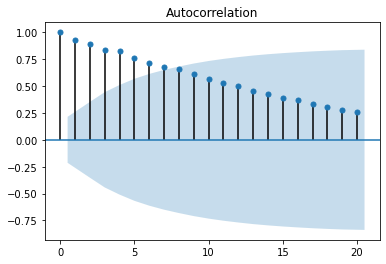

In [45]:
plot_acf(data['data']);

### División train/test

Antes de ponernos a utilizar cualquier método de predicción, debemos que tener claro cómo separar los datos para entrenar nuestro modelo y realizar las predicciones, pues una mala selección puede hacer que sobreestimemos el performance del modelo y luego veamos que los resultados en producción son mucho peores de lo que habíamos calculado.

Por lo tanto, para dividir los datos en train/test no podemos utilizar el modo basado en ``train_test_split``, ya que nos desordenaría los datos. Tenemos que mantener el orden temporal para no utilizar información del futuro en las predicciones, pues a la hora de predecir serán datos que no tengamos. Para ello, vamos a guardarnos un 50% de los datos totales para train y el resto para test, aunque empezaremos probando a predecir a corto, y luego iremos aumentando, para observar el efecto del modelo:

In [46]:
X = data['data'].values

# Calculamos los puntos de train y test:
n_puntos_train = int(len(data)*0.5)
n_puntos_test = len(data) - n_puntos_train
# También nos creamos una serie de puntos para predecir a corto. Normalmente, esto no se hace, simplemente lo haremos aquí para observar y entender
#el efecto del modelo:
n_puntos_a_corto = 20

train = X[:n_puntos_train]
test = X[n_puntos_train:]
test_a_corto = test[:n_puntos_a_corto]

test_a_corto

array([3.69, 3.6 , 3.6 , 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58,
       5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74])

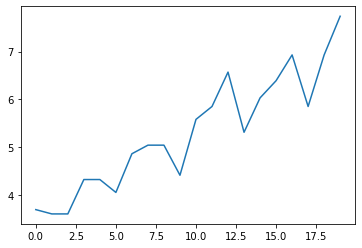

In [47]:
plt.plot(test_a_corto);

## Autorregresión

Vamos a comenzar con uno de los modelos de regresión que hemos visto, el modelo AR, que si recuerdas es un modelo de regresión lineal basado en los instantes anteriores.

Tendremos que encontrar el orden de autorregresión que mejor encaje con nuestros datos, para lo cual variaremos los parámetros hasta encontrar los que mejor se ajusten, comenzando por un orden $p=1$:

In [48]:
model_ar = ARIMA(order=(1, 0, 0))
model_ar_fit = model_ar.fit(train)

In [49]:
predictions = model_ar_fit.predict(n_puntos_a_corto)
print("mean_squared_error:", mean_squared_error(test_a_corto, predictions))
print("root mean_squared_error:", np.sqrt(mean_squared_error(test_a_corto, predictions)))

mean_squared_error: 7.251479733524851
root mean_squared_error: 2.692857169165281


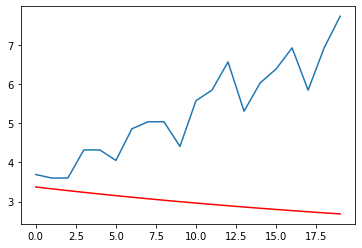

In [50]:
plt.plot(test_a_corto)
plt.plot(predictions, color='red');

No parece que obtengamos un gran resultado con el AR(1) (que es lo mismo que decir un modelo ARIMA(1, 0, 0)). Probemos diferentes lags, a ver cuál sería el mejor:

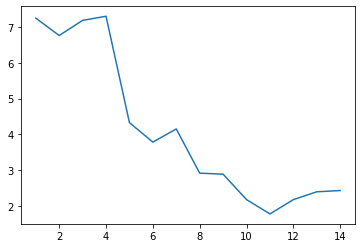

In [12]:
lags = []
mse = []
for lag in range(1, 15):
    try:
        model_ar = ARIMA(order=(lag, 0, 0))
        model_ar_fit = model_ar.fit(train)
        predictions = model_ar_fit.predict(n_puntos_a_corto)
        lags.append(lag)
        mse.append(mean_squared_error(test_a_corto, predictions))
        
    except:
        continue
    
plt.plot(lags, mse);

Como podemos comprobar, a medida que aumentamos los lags que tenemos en cuenta, conseguimos mejorar el resultado, ya que tenemos en cuenta una mayor ventana temporal. Sin embargo, observamos también un par de elementos más.

Por una parte, vemos que existen ciertas irregularidades al aumentar el número de lags utilizados, lo que se deriba de la insetabilidad que supone tener variables muy correlacionadas entre sí (multicolinearidad).

Por otro lado, también observamos que a partir de un lag concreto, el modelo empeora, también debido a la relación entre diferentes lags.

Finalmente, también se debe destacar que, al utilizar modelos $AR(p)$, la predicción variará mucho en base al $p$ elegido, debido a que las predicciones futuras dependerán de las predicciones anteriores y estamos trabajando con un modelo lineal.

Este efecto lo observaremos un poco más adelante, ahora pasemos a probar el mejor modelo (a corto) que hemos descubierto:

1.7714585119088735

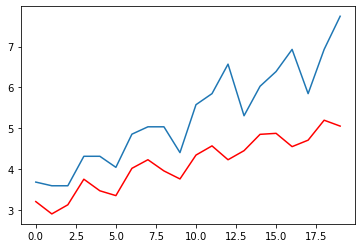

In [52]:
# Representamos el mejor modelo que hemos visto:
best_model_ar = ARIMA(order=(11, 0, 0))
best_model_ar_fit = best_model_ar.fit(train)
best_model_ar_predictions_corto = best_model_ar_fit.predict(n_puntos_a_corto)

plt.plot(test_a_corto)
plt.plot(best_model_ar_predictions_corto, color='red');
mean_squared_error(test_a_corto, best_model_ar_predictions_corto)

Como podemos observar, parece que hemos obtenido un buen modelo, ya que la predicción, pese a que está por debajo, parece que relfeja, en mayor o menor medida, las variaciones de los datos originales. Veamos qué ocurre si aumentamos el horizonte temporal a todos los datos de test que tenemos:

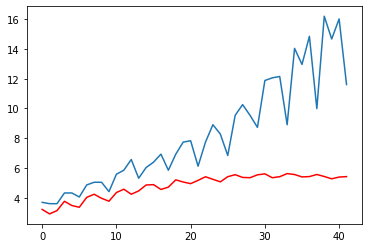

In [53]:
# Representamos el mejor modelo que hemos visto:
best_model_ar_predictions = best_model_ar_fit.predict(n_puntos_test)

plt.plot(test)
plt.plot(best_model_ar_predictions, color='red');
# mean_squared_error(test, best_model_ar_predictions)

Como podemos ver en la gráfica, el modelo empeora drásticamente a medida que aumentamos el horizonte temporal de predicción. Este efecto, que hemos adelantado antes, es debido a la naturaleza del modelo AR, cuyos efectos se disipan con el tiempo por depender de sus propias predicciones bajo un modelo lineal.

#### Autorregresión con series estacionarias

Acabamos de comprobar que, pese a no tener una serie temporal estacionaria, hemos podido predecir con un modelo AR sin falta de recurrir a una serie estacionaria. En parte tiene sentido pues, al fin y al cabo, existe relación entre la variable a predecir y sus lags. Sin embargo, también podemos observar que no es capaz de predecir la media, ya que a medida que aumenta el eje temporal tiende a un valor constante, lo cual se corresponde con lo que hemos comentado de la subestimación de la media cuando utilizamos series no estacionarias.

Por ello, vamos a probar a ver qué pasaría si tuviéramos una serie estacionaria, para lo cual comenzaremos comprobando si realmente es no estacionaria:

In [57]:
adfuller(data)[1]

1.0

Evidentemente, no es estacionaria en media. La quitamos y probamos:

In [58]:
adfuller(data.diff().dropna())[1]

0.9088542416911316

In [59]:
adfuller(data.diff().diff().dropna())[1]

0.006051099869602965

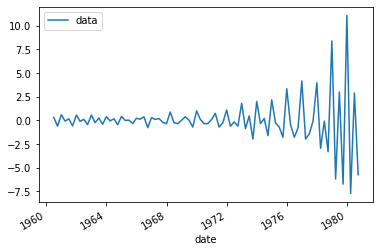

In [60]:
data.diff().diff().plot()

Podemos observar que, pese a que diferenciando conseguimos eliminar la tendencia, podemos observar que la varianza va en aumento, por lo que no será estacionaria en varianza que, aunque por lo general suele afectar en menor medida que la tendencia, también afecta.

Por lo tanto, lo que tenemos que hacer es realizar alguna transformación de los datos, ya sea logarítmica, raíz cuadrada, Box-Cox...

En este caso, probaremos con la transformación logarítmica:

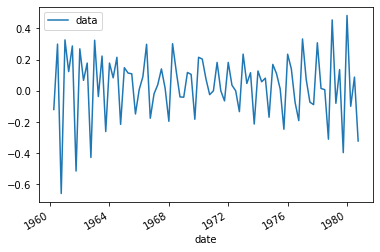

In [61]:
np.log(data).diff().plot()

Realizando la transformación y la diferencia, observamos cierta variación en la varianza que nos hace sospechar, así que volveremos a aplicar otra transformación a ver qué obtenemos:

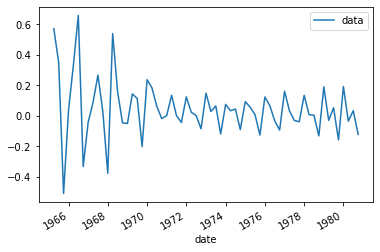

In [62]:
np.log(np.log(data)).diff().plot()

En este caso, podemos comprobar que, pese a que empieza reduciéndose, se mantiene constante en instantes posteriores, con lo que concluiremos que de esta forma la conseguimos transformar en estacionaria.

Ahora, los siguientes pasos serán hacer la transformación, predecir y volver a los datos en su forma original. Para ello, vamos a hacer uso de un par de funciones bastante sencillas pero con cierta lógica, especialmente diseñadas para este ejercicio. Si tuvieras que hacer otras transformaciones, la forma de actuar sería semejante, aunque cambiando las funciones de transformación/inversión:

In [63]:
# Definimos funciones para convertir y reconvertir en base a la varianza:
def loglog(data):
    min_y1 = min(data)
    y = np.log(1 + data - min_y1)
    min_y2 = min(y)
    y2 = np.log(1 + y - min_y2)
    base_y2 = y2.iloc[0]

    return y2.diff().dropna(), min_y1, min_y2, base_y2

def inverse_loglog(data, min_y1, min_y2, base_y2):
    # Los nombres min_y1 y min_y2 se corresponden con los que devuelve loglog()
    y = data.cumsum() + base_y2
    # Sumamos los mínimos al revés
    y2 = np.exp(y) - 1 + min_y2
    return np.exp(y2) - 1 + min_y1

En este caso, las funciones lo que hacen es transformar y revertir la transformación, solo que, debido a que para la transformación es necesaria información inicial, deberemos guardar ciertos parámetros de ese prier punto. En este caso, no estaríamos haciendo trampas con datos de futuro, ya que simplemente es para que la transformación sea posible, no estamos obteniendo información extra.

Utilicemos las funciones para transformar los datos:

In [64]:
new_data, l1, l2, base_y2 = loglog(data['data'])
# inverse_loglog(d, l1, l2, base_y2)

In [65]:
X2 = new_data.values

n_puntos_train2 = int(len(X2)*0.5)
n_puntos_test2 = len(X2) - n_puntos_train2
n_puntos_a_corto2 = 20

train2 = X2[:n_puntos_train2]
test2 = X2[n_puntos_train2:]
test_a_corto2 = test2[:n_puntos_a_corto2]

test_a_corto2

array([ 0.02719075, -0.00878577,  0.        ,  0.06373778,  0.        ,
       -0.02226308,  0.06205821,  0.01207168,  0.        , -0.04482259,
        0.0780741 ,  0.01517284,  0.03657187, -0.06784987,  0.04092184,
        0.0182648 ,  0.02514354, -0.05305219,  0.05305219,  0.0335071 ])

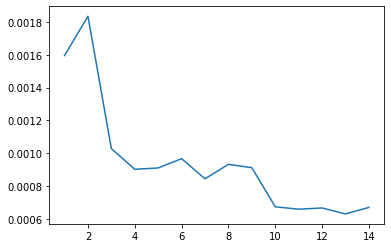

In [66]:
# Calculamos el mse para la nueva predicción (ojo, ahora los valores no tienen el mismo significado que antes, pues estamos midiendo en otra escala):
lags = []
mse = []
for lag in range(1, 15):
    try:
        model_ar2 = ARIMA(order=(lag, 0, 0))
        model_ar_fit2 = model_ar2.fit(train2)
        predictions2 = model_ar_fit2.predict(n_puntos_a_corto2)
        lags.append(lag)
        mse.append(mean_squared_error(test_a_corto2, predictions2))
        
    except:
        continue
    
plt.plot(lags, mse);

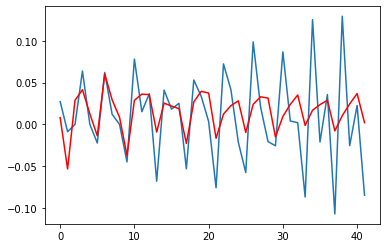

In [68]:
# Representamos el mejor modelo que hemos visto:
best_model_ar2 = ARIMA(order=(13, 0, 0))
best_model_ar_fit2 = best_model_ar2.fit(train2)
best_model_ar_predictions2 = best_model_ar_fit2.predict(n_puntos_test2)

plt.plot(test2)
plt.plot(best_model_ar_predictions2, color='red');
# mean_squared_error(test2, best_model_ar_predictions2)

36.664853068988705

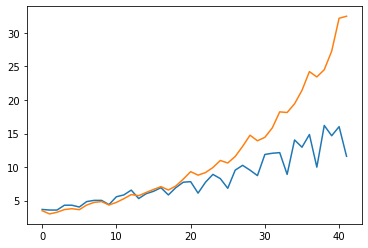

In [69]:
series_completa = pd.Series(train2).append(pd.Series(best_model_ar_predictions2)).reset_index(drop=True)

plt.plot(test)
final_prediction = inverse_loglog(series_completa, l1, l2, base_y2)[n_puntos_train2:].reset_index(drop=True)
final_prediction.plot();
mean_squared_error(test, final_prediction)

Como se puede comprobar, parece que el modelo, pese a ser capaz de detectar la tendencia, no la predice del todo bien y empeora la predicción pese a ser estacionario. Bueno, eso no es del todo cierto, ya que la parte que hace que no prediga bien a partir de cierto valor no es culpa de la estacionariedad o no estacionariedad de la serie, sino de su naturaleza AR.

Entonces, ¿en qué afecta la estacionariedad? Pues observemos la predicción a corto, donde se aprecia la calidad de predicción con independencia de la ventana temporal:

0.215627988080618

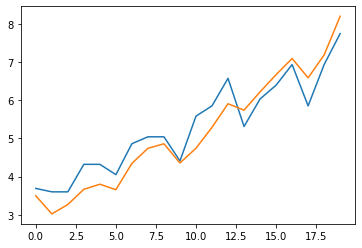

In [70]:
series_completa = pd.Series(train2).append(pd.Series(best_model_ar_predictions2)).reset_index(drop=True)

plt.plot(test[:20])
final_prediction = inverse_loglog(series_completa, l1, l2, base_y2)[n_puntos_train2:].reset_index(drop=True)
final_prediction[:20].plot();
mean_squared_error(test[:20], final_prediction[:20])

En la gráfica se demuestra que se mejora la predicción a corto, ya que debido a predecir una serie estacionaria se puede obtener el efecto de la tendencia al revertir esta transformación, aunque los efectos a largo no podemos compararlos con la otra versión, que simplemente tiende a un valor constante.

### EJERCICIO

Probemos lo que acabamos de ver con otro dataset:
  1. Lee el dataset ``data/birthdays_year.csv``
  2. Divide los datos un 70% para train y un 30% para test
  3. Busca el mejor modelo AR (con un valor de p <= 15)
  4. Predice el 30% de datos restante y represéntalo frente a los datos de test
  5. Calcula el MSE
  6. Prueba un modelo AR de orden 50, ¿qué observas?
  7. Repite el poreceso pero cambia los datos por medias semanales

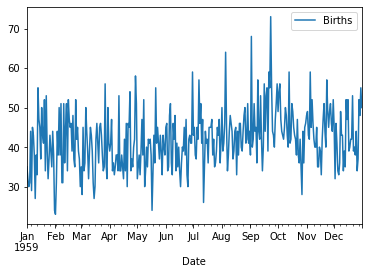

In [28]:
df_ej_ar = pd.read_csv("data/birthdays_year.csv", parse_dates=['Date'], index_col='Date')
df_ej_ar.plot()

In [29]:
X_ej_ar = df_ej_ar['Births'].values

# Calculamos los puntos de train y test:
n_puntos_train_ej_ar = int(len(df_ej_ar)*0.7)
n_puntos_test_ej_ar = len(df_ej_ar) - n_puntos_train_ej_ar

train_ej_ar = X_ej_ar[:n_puntos_train_ej_ar]
test_ej_ar = X_ej_ar[n_puntos_train_ej_ar:]

np.random.seed(10)

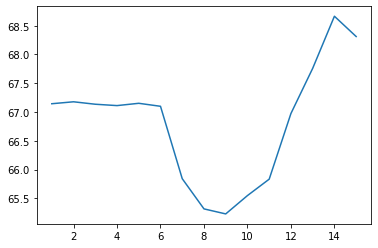

In [30]:
# Calculamos el mse para la nueva predicción (ojo, ahora los valores no tienen el mismo significado que antes, pues estamos midiendo en otra escala):
lags_ej_ar = []
mse_ej_ar = []
for lag in range(1, 16):
    try:
        modelo_ej_ar = ARIMA(order=(lag, 0, 0))
        modelo_ej_ar_fit = modelo_ej_ar.fit(train_ej_ar)
        predictions_ej_ar = modelo_ej_ar_fit.predict(n_puntos_test_ej_ar)
        lags_ej_ar.append(lag)
        mse_ej_ar.append(mean_squared_error(test_ej_ar, predictions_ej_ar))
    except:
        continue
    
plt.plot(lags_ej_ar, mse_ej_ar);

65.22837312276248

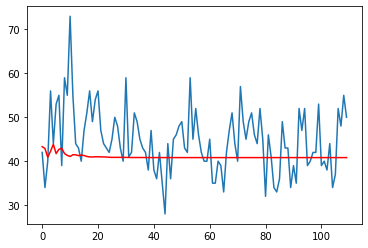

In [31]:
# Representamos el mejor modelo que hemos visto:
best_model_ej_ar = ARIMA(order=(9, 0, 0))
best_model_ej_ar_fit = best_model_ej_ar.fit(train_ej_ar)
best_model_ej_ar_predictions = best_model_ej_ar_fit.predict(n_puntos_test_ej_ar)

plt.plot(test_ej_ar)
plt.plot(best_model_ej_ar_predictions, color='red');
mean_squared_error(test_ej_ar, best_model_ej_ar_predictions)

Probamos con muchos más, a ver qué pasa:

In [34]:
# Calculamos el mse para la nueva predicción (ojo, ahora los valores no tienen el mismo significado que antes, pues estamos midiendo en otra escala):
lags_ej_ar = []
mse_ej_ar = []
for lag in range(45, 55):
    try:
        modelo_ej_ar = ARIMA(order=(lag, 0, 0))
        modelo_ej_ar_fit = modelo_ej_ar.fit(train_ej_ar)
        predictions_ej_ar = modelo_ej_ar_fit.predict(n_puntos_test_ej_ar)
        lags_ej_ar.append(lag)
        mse_ej_ar.append(mean_squared_error(test_ej_ar, predictions_ej_ar))
    except:
        continue
    
plt.plot(lags_ej_ar, mse_ej_ar);

73.62311936352201

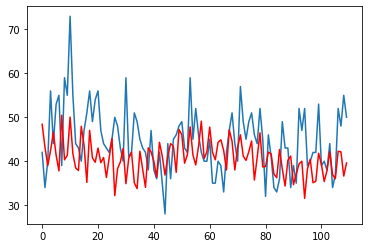

In [35]:
# Representamos el mejor modelo que hemos visto:
best_model_ej_ar = ARIMA(order=(54, 0, 0))
best_model_ej_ar_fit = best_model_ej_ar.fit(train_ej_ar)
best_model_ej_ar_predictions = best_model_ej_ar_fit.predict(n_puntos_test_ej_ar)

plt.plot(test_ej_ar)
plt.plot(best_model_ej_ar_predictions, color='red');
mean_squared_error(test_ej_ar, best_model_ej_ar_predictions)

Lo que observamos al subir el orden del AR, es esa inestabilidad de la que hablábamos antes, por eso tan de repente pasa de un error "normal" a otro descomunal. Además, si nos fijamos, los erores "normales" han subido respecto a los de menor orden. Por eso no es bueno tomar demaisadas muestras. Sí que nos ayuda a la hora de tener más variación a lo largo del eje temporal, pero es mucho más inestable, y su naturaleza hace que sea más erróneo.

Comprobemos ahora qué pasa al trabajar sobre un dataset con datos semanales, lo que debería mejorar nuestras predicciones al predecir sobre menor número de puntos, que además tienen menos ruido (todo ventajas):

In [36]:
df_ej_ar_sem = df_ej_ar.copy()
# El .iloc[1:-1] es para eliminar las semanas incompletas:
df_ej_ar_sem = df_ej_ar_sem.groupby(df_ej_ar_sem.index.week).mean().iloc[1:-1]
df_ej_ar_sem.head()

,Births
Date,
2,37.714286
3,44.285714
4,41.142857
5,35.142857
6,40.428571


In [37]:
X_sem = df_ej_ar_sem['Births'].values
# Calculamos los puntos de train y test:
n_puntos_train_ej_ar_sem = int(len(X_sem)*0.7)
n_puntos_test_ej_ar_sem = len(X_sem) - n_puntos_train_ej_ar_sem

train_ej_ar_sem = X_sem[:n_puntos_train_ej_ar_sem]
test_ej_ar_sem = X_sem[n_puntos_train_ej_ar_sem:]

np.random.seed(10)

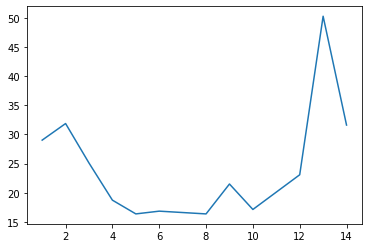

In [38]:
# Buscamos el mejor modelo
lags = []
mse = []
for lag in range(1, 16):
    try:
        model_ej_ar_sem = ARIMA(order=(lag, 0, 0))
        model_ej_ar_sem_fit = model_ej_ar_sem.fit(train_ej_ar_sem)
        predictions_ej_ar_sem = model_ej_ar_sem_fit.predict(n_puntos_test_ej_ar_sem)
        lags.append(lag)
        mse.append(mean_squared_error(test_ej_ar_sem, predictions_ej_ar_sem))
    except:
        continue
plt.plot(lags, mse);

16.367574679171383

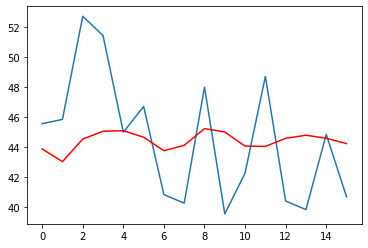

In [40]:
best_model_ej_ar_sem = ARIMA(order=(8, 0, 0))
best_model_ej_ar_sem_fit = best_model_ej_ar_sem.fit(train_ej_ar_sem)
best_model_ej_ar_sem_predictions = best_model_ej_ar_sem_fit.predict(n_puntos_test_ej_ar_sem)
plt.plot(test_ej_ar_sem)
plt.plot(best_model_ej_ar_sem_predictions, color='red');
mean_squared_error(test_ej_ar_sem, best_model_ej_ar_sem_predictions)

## Medias móviles

En este caso tendremos en cuenta los errores. El problema es que si tenemos muchos errores al principio, los iremos arrastrando durante las predicciones.

In [71]:
X = data['data'].values

# Calculamos los puntos de train y test:
n_puntos_train = int(len(data)*0.5)
n_puntos_test = len(data) - n_puntos_train
# También nos creamos una serie de puntos para predecir a corto. Normalmente, esto no se hace, simplemente lo haremos aquí para observar y entender
#el efecto del modelo:
n_puntos_a_corto = 20

train = X[:n_puntos_train]
test = X[n_puntos_train:]
test_a_corto = test[:n_puntos_a_corto]

test_a_corto

array([3.69, 3.6 , 3.6 , 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58,
       5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74])

In [72]:
model_ma = ARIMA(order=(0, 0, 1))
model_ma_fit = model_ma.fit(train)

In [73]:
predictions_ma = model_ma_fit.predict(n_puntos_a_corto)
print("mean_squared_error:", mean_squared_error(test_a_corto, predictions_ma))
print("root mean_squared_error:", np.sqrt(mean_squared_error(test_a_corto, predictions_ma)))

mean_squared_error: 16.534392618748008
root mean_squared_error: 4.066250437288388


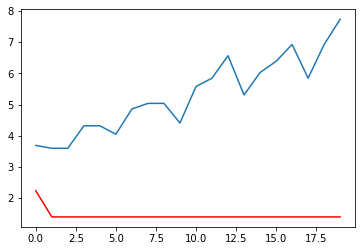

In [74]:
plt.plot(test_a_corto)
plt.plot(predictions_ma, color='red');

No parece que obtengamos un gran resultado con el MA(1) (que es lo mismo que decir un modelo ARIMA(0, 0, 1)). Probemos diferentes lags, a ver cuál sería el mejor:

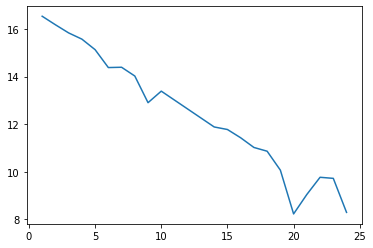

In [75]:
lags = []
mse = []
for lag in range(1, 25):
    try:
        model_ma = ARIMA(order=(0, 0, lag))
        model_ma_fit = model_ma.fit(train)
        predictions_ma = model_ma_fit.predict(n_puntos_a_corto)
        lags.append(lag)
        mse.append(mean_squared_error(test_a_corto, predictions_ma))
        
    except:
        continue
    
plt.plot(lags, mse);

Como podemos observar, al aumentar el número de errores que tenemos en cuenta para predecir, mejoramos la respuesta. Sin embargo, seguimos teniendo mucho error debido a que estamos arrastrando el error cometido al principio. Podríamos seguir aumentando la ventana, con lo que seguiríamos bajando el error hasta cierto límite, pero seguiría siendo muy elevado, así que vamos a tomar el mejor de los que acabamos de ver:

8.23189892574919

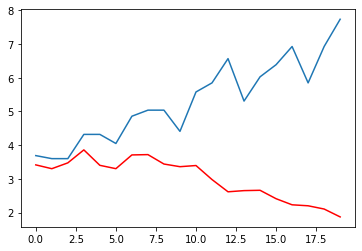

In [76]:
# Representamos el mejor modelo que hemos visto:
best_model_ma = ARIMA(order=(0, 0, 20))
best_model_ma_fit = best_model_ma.fit(train)
best_model_ma_predictions_corto = best_model_ma_fit.predict(n_puntos_a_corto)

plt.plot(test_a_corto)
plt.plot(best_model_ma_predictions_corto, color='red');
mean_squared_error(test_a_corto, best_model_ma_predictions_corto)

Como podemos observar, parece que hemos mejorado mucho el modelo, ya que la predicción, pese a que está por debajo, parece que refleja las variaciones de los datos originales (aunque se nota que seguimos teniendo más error que con el modelo AR). Veamos qué ocurre si aumentamos el horizonte temporal a todos los datos de test que tenemos (aunque ya se intuye):

51.83028372813752

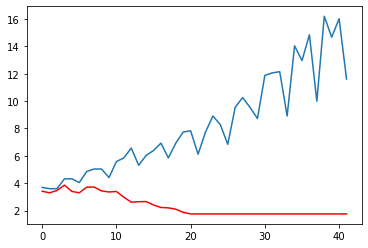

In [78]:
# Representamos el mejor modelo que hemos visto:
best_model_ma_predictions = best_model_ma_fit.predict(n_puntos_test)

plt.plot(test)
plt.plot(best_model_ma_predictions, color='red');
mean_squared_error(test, best_model_ma_predictions)

En este caso, podemos observar que la calidad del modelo también se reduce a medida que aumentamos el eje temporal, al igual que con el modelo AR.

Probemos con el caso estacionario:

In [79]:
new_data, l1, l2, base_y2 = loglog(data['data'])
# inverse_loglog(d, l1, l2, base_y2)

In [80]:
X2 = new_data.values

n_puntos_train2 = int(len(X2)*0.5)
n_puntos_test2 = len(X2) - n_puntos_train2
n_puntos_a_corto2 = 20

train2 = X2[:n_puntos_train2]
test2 = X2[n_puntos_train2:]
test_a_corto2 = test2[:n_puntos_a_corto2]

test_a_corto2

array([ 0.02719075, -0.00878577,  0.        ,  0.06373778,  0.        ,
       -0.02226308,  0.06205821,  0.01207168,  0.        , -0.04482259,
        0.0780741 ,  0.01517284,  0.03657187, -0.06784987,  0.04092184,
        0.0182648 ,  0.02514354, -0.05305219,  0.05305219,  0.0335071 ])

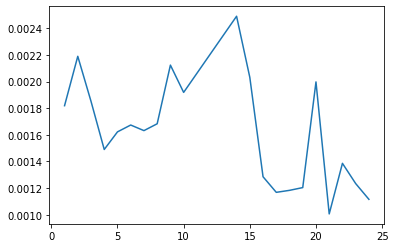

In [81]:
# Calculamos el mse para la nueva predicción (ojo, ahora los valores no tienen el mismo significado que antes, pues estamos midiendo en otra escala):
lags = []
mse = []
for lag in range(1, 25):
    try:
        model_ma2 = ARIMA(order=(0, 0, lag))
        model_ma_fit2 = model_ma2.fit(train2)
        predictions_ma2 = model_ma_fit2.predict(n_puntos_a_corto2)
        lags.append(lag)
        mse.append(mean_squared_error(test_a_corto2, predictions_ma2))
        
    except:
        continue
    
plt.plot(lags, mse);

0.00282221388824484

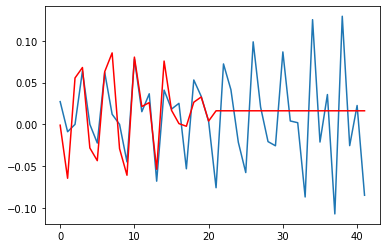

In [82]:
# Representamos el mejor modelo que hemos visto:
best_model_ma2 = ARIMA(order=(0, 0, 21))
best_model_ma_fit2 = best_model_ma2.fit(train2)
best_model_ma_predictions2 = best_model_ma_fit2.predict(n_puntos_test2)

plt.plot(test2)
plt.plot(best_model_ma_predictions2, color='red');
mean_squared_error(test2, best_model_ma_predictions2)

24.376878156231083

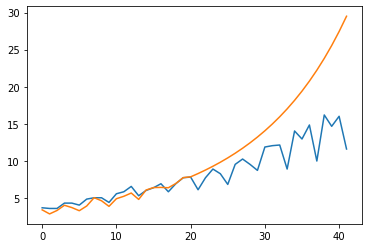

In [83]:
series_completa = pd.Series(train2).append(pd.Series(best_model_ma_predictions2)).reset_index(drop=True)

plt.plot(test)
final_prediction = inverse_loglog(series_completa, l1, l2, base_y2)[n_puntos_train2:].reset_index(drop=True)
final_prediction.plot();
mean_squared_error(test, final_prediction)

Como se puede comprobar, el modelo mejora respecto al no estacionario, ya que, además de predecir mejor a corto, la tendencia exponencial que se obtiene al predecir una constante de la serie estacionaria, que se aproxima mejor en este periodo temporal. Sin embargo, sigue creciendo tan rápido que en el futuro sería "menos malo" el error de la constante del modelo no estacionario.

0.27091377064232425

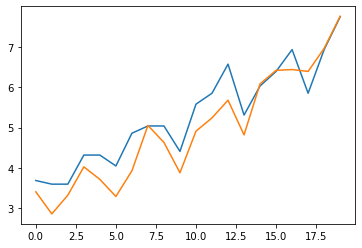

In [84]:
series_completa = pd.Series(train2).append(pd.Series(best_model_ma_predictions2)).reset_index(drop=True)

plt.plot(test[:20])
final_prediction = inverse_loglog(series_completa, l1, l2, base_y2)[n_puntos_train2:].reset_index(drop=True)
final_prediction[:20].plot();
mean_squared_error(test[:20], final_prediction[:20])

En la gráfica se demuestra que se mejora la predicción a corto, ya que debido a predecir una serie estacionaria se puede obtener el efecto de la tendencia al revertir esta transformación, aunque los efectos a largo no podemos compararlos con la otra versión, que simplemente tiende a un valor constante.

### EJERCICIO

Probemos lo que acabamos de ver con otro dataset:
  1. Lee el dataset ``data/birthdays_year.csv``
  2. Divide los datos un 70% para train y un 30% para test
  3. Busca el mejor modelo MA (con un valor de p <= 25)
  4. Predice el 30% de datos restante y represéntalo frente a los datos de test
  5. Calcula el MSE
  6. Prueba un modelo AR de orden 50, ¿qué observas?
  7. Repite el poreceso pero cambia los datos por medias semanales

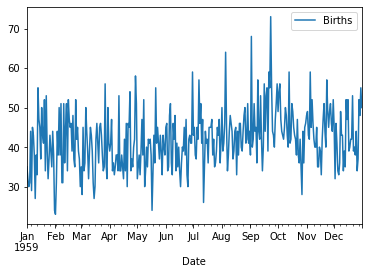

In [207]:
df_ej_ma = pd.read_csv("data/birthdays_year.csv", parse_dates=['Date'], index_col='Date')
df_ej_ma.plot()

In [208]:
X_ej_ma = df_ej_ma['Births'].values

# Calculamos los puntos de train y test:
n_puntos_train_ej_ma = int(len(df_ej_ma)*0.7)
n_puntos_test_ej_ma = len(df_ej_ma) - n_puntos_train_ej_ma

train_ej_ma = X_ej_ma[:n_puntos_train_ej_ma]
test_ej_ma = X_ej_ma[n_puntos_train_ej_ma:]

np.random.seed(10)

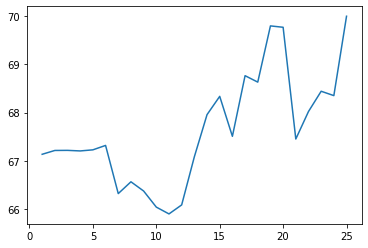

In [211]:
# Calculamos el mse para la nueva predicción (ojo, ahora los valores no tienen el mismo significado que antes, pues estamos midiendo en otra escala):
lags_ej_ma = []
mse_ej_ma = []
for lag in range(1, 26):
    try:
        modelo_ej_ma = ARIMA(order=(0, 0, lag))
        modelo_ej_ma_fit = modelo_ej_ma.fit(train_ej_ma)
        predictions_ej_ma = modelo_ej_ma_fit.predict(n_puntos_test_ej_ma)
        lags_ej_ma.append(lag)
        mse_ej_ma.append(mean_squared_error(test_ej_ar, predictions_ej_ma))
    except:
        continue
    
plt.plot(lags_ej_ma, mse_ej_ma);

65.90011472625963

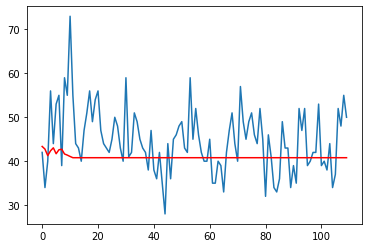

In [212]:
# Representamos el mejor modelo que hemos visto:
best_model_ej_ma = ARIMA(order=(0, 0, 11))
best_model_ej_ma_fit = best_model_ej_ma.fit(train_ej_ar)
best_model_ej_ma_predictions = best_model_ej_ma_fit.predict(n_puntos_test_ej_ma)

plt.plot(test_ej_ma)
plt.plot(best_model_ej_ma_predictions, color='red');
mean_squared_error(test_ej_ma, best_model_ej_ma_predictions)

Probamos con muchos más, a ver qué pasa:

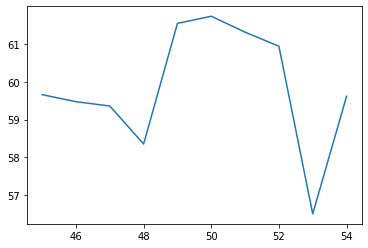

In [213]:
# Calculamos el mse para la nueva predicción (ojo, ahora los valores no tienen el mismo significado que antes, pues estamos midiendo en otra escala):
lags_ej_ma = []
mse_ej_ma = []
for lag in range(45, 55):
    try:
        modelo_ej_ma = ARIMA(order=(0, 0, lag))
        modelo_ej_ma_fit = modelo_ej_ma.fit(train_ej_ma)
        predictions_ej_ma = modelo_ej_ma_fit.predict(n_puntos_test_ej_ma)
        lags_ej_ma.append(lag)
        mse_ej_ma.append(mean_squared_error(test_ej_ma, predictions_ej_ma))
    except:
        continue
    
plt.plot(lags_ej_ma, mse_ej_ma);

56.49721010791118

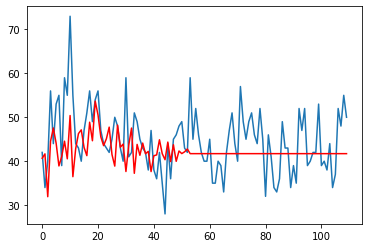

In [214]:
# Representamos el mejor modelo que hemos visto:
best_model_ej_ma = ARIMA(order=(0, 0, 53))
best_model_ej_ma_fit = best_model_ej_ma.fit(train_ej_ma)
best_model_ej_ma_predictions = best_model_ej_ma_fit.predict(n_puntos_test_ej_ma)

plt.plot(test_ej_ma)
plt.plot(best_model_ej_ma_predictions, color='red');
mean_squared_error(test_ej_ma, best_model_ej_ma_predictions)

In [215]:
df_ej_ma_sem = df_ej_ma.copy()
# El .iloc[1:-1] es para eliminar las semanas incompletas:
df_ej_ma_sem = df_ej_ma_sem.groupby(df_ej_ma_sem.index.week).mean().iloc[1:-1]
df_ej_ma_sem.head()

,Births
Date,
2,37.714286
3,44.285714
4,41.142857
5,35.142857
6,40.428571


In [216]:
X_sem = df_ej_ma_sem['Births'].values
# Calculamos los puntos de train y test:
n_puntos_train_ej_ma_sem = int(len(X_sem)*0.7)
n_puntos_test_ej_ma_sem = len(X_sem) - n_puntos_train_ej_ma_sem

train_ej_ma_sem = X_sem[:n_puntos_train_ej_ma_sem]
test_ej_ma_sem = X_sem[n_puntos_train_ej_ma_sem:]

np.random.seed(10)

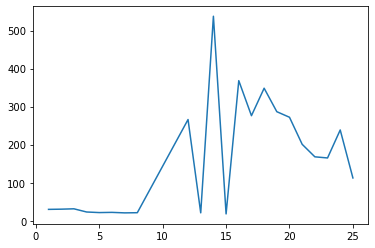

In [217]:
# Buscamos el mejor modelo
lags = []
mse = []
for lag in range(1, 26):
    try:
        model_ej_ma_sem = ARIMA(order=(0, 0, lag))
        model_ej_ma_sem_fit = model_ej_ma_sem.fit(train_ej_ma_sem)
        predictions_ej_ma_sem = model_ej_ma_sem_fit.predict(n_puntos_test_ej_ma_sem)
        lags.append(lag)
        mse.append(mean_squared_error(test_ej_ma_sem, predictions_ej_ma_sem))
    except:
        continue
plt.plot(lags, mse);

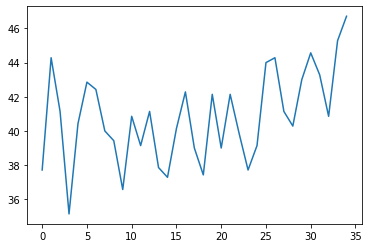

In [239]:
plt.plot(np.round(train_ej_ma_sem, 4))

17.86833254303549

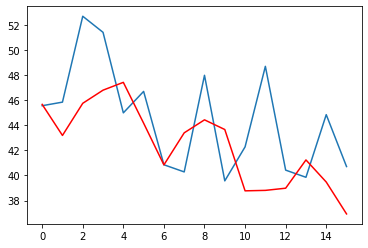

In [247]:
best_model_ej_ma_sem = ARIMA(order=(0, 0, 15))
best_model_ej_ma_sem_fit = best_model_ej_ma_sem.fit(train_ej_ma_sem)
best_model_ej_ma_sem_predictions = best_model_ej_ma_sem_fit.predict(n_puntos_test_ej_ma_sem)
plt.plot(test_ej_ma_sem)
plt.plot(best_model_ej_ma_sem_predictions, color='red');
mean_squared_error(test_ej_ma_sem, best_model_ej_ma_sem_predictions)

## ARIMA
En el modelo ARIMA no solo influyen los parámetros `p` y `q`, sino que también tendremos en cuenta `d`, parámetro con el que diferenciaremos la serie y conseguiremos que sea estacionaria.

Ahora bien, ¿cuál es la mejor combinación de parámetros? Tendremos que realizar varias pruebas. Para comparar los modelos se suele utilizar el AIC.

### AIC

Akaike’s Information Criterion (Criterio de Información de Akaike):

![imagen](./img/aic.png)

donde $k$ es el número de parámetros del modelo estadístico, y $L$ es el máximo valor de la función de verosimilitud para el modelo estimado. La función de verosimilitud permite realizar inferencias a partir de un conjunto de observaciones.

Se utiliza para seleccionar el mejor modelo, que será el que tiene menor AIC. El AIC depende mucho de cada dato, y es una medida de comparación entre modelos, no de presentación de resultados. Un AIC bajo no quiere decir que el modelo sea muy bueno. Por tanto, AIC no nos dice nada sobre la calidad del modelo en términos absolutos.


#### ¿Cómo conseguir los mejores p, d, q?

Pues probando y quedándonos con el que mejor métrica nos devuelva, que en este caso será el AIC. Para ello, generaremos las posibles combinaciones de parámetros:

In [85]:
data = pd.read_csv("data/jj.csv", parse_dates=['date'], index_col='date')
print(len(data))
data.tail()

84


,data
date,
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


In [86]:
X = data['data'].values

# Calculamos los puntos de train y test:
n_puntos_train = int(len(data)*0.5)
n_puntos_test = len(data) - n_puntos_train
# También nos creamos una serie de puntos para predecir a corto. Normalmente, esto no se hace, simplemente lo haremos aquí para observar y entender
#el efecto del modelo:
n_puntos_a_corto = 20

train = X[:n_puntos_train]
test = X[n_puntos_train:]
test_a_corto = test[:n_puntos_a_corto]

test_a_corto

array([3.69, 3.6 , 3.6 , 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58,
       5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74])

In [87]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p, d, q))
pdq[:3]

[(0, 0, 0), (0, 0, 1), (0, 0, 2)]

In [88]:
results = []
for param in pdq:
    try:
        model_arima = ARIMA(order=param)
        model_arima_fit = model_arima.fit(train)
        results.append((param,model_arima_fit.aic()))
    except:
        continue
    

In [89]:
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

,ARIMA params,AIC
86,"(3, 2, 1)",-14.879814
89,"(3, 2, 4)",-14.642604
87,"(3, 2, 2)",-13.413875
111,"(4, 2, 1)",-13.247649
88,"(3, 2, 3)",-12.444054


Ya tenemos la mejor combinación de parámetros para el ARIMA. Probemos el modelo

In [90]:
best_model_arima = ARIMA(order=(3,2,1))
best_model_arima.fit(train)
best_model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(3, 2, 1)   Log Likelihood                  13.440
Date:                Tue, 16 Mar 2021   AIC                            -14.880
Time:                        18:34:37   BIC                             -4.747
Sample:                             0   HQIC                           -11.216
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0119      0.005      2.554      0.011       0.003       0.021
ar.L1         -0.9130      0.148     -6.176      0.000      -1.203      -0.623
ar.L2         -0.9437      0.167     -5.653      0.000      -1.271      -0.617
ar.L3         -0.7191      0.154     -4.682      0.000      -1.020      -0.418
ma.L1         -0.9953      2.037     -0.489      0.625      -4.988       2.998
sigma2         0.0238      0.046      0.514      0.607      -0.067       0.115
===================================================================================
Ljung-Box (Q):                       37.65   Jarque-Bera (JB):                 4.25
Prob(Q):                              0.53   Prob(JB):                         0.12
Heteroskedasticity (H):               5.44   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.8124251413753424

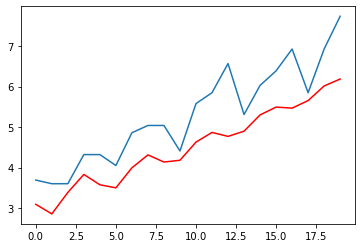

In [93]:
# Representamos el mejor modelo que hemos visto:
best_model_arima_predictions_corto = best_model_arima.predict(n_puntos_a_corto)

plt.plot(test_a_corto)
plt.plot(best_model_arima_predictions_corto, color='red');
mean_squared_error(test_a_corto, best_model_arima_predictions_corto)

Como podemos observar, parece que hemos obtenido un buen modelo que mejora los anteriores (sin contar las versiones estacionarias). Veamos cómo se comporta a mayor escala temporal:

4.978060598170306

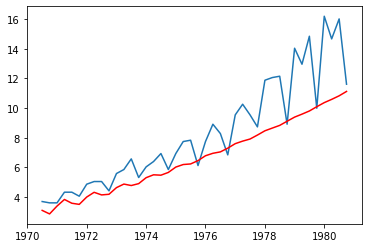

In [94]:
# Representamos el mejor modelo que hemos visto:
best_model_arima_predictions = best_model_arima.predict(n_puntos_test)

plt.plot(data['data'][n_puntos_train:].index, test)
plt.plot(data['data'][n_puntos_train:].index, best_model_arima_predictions, color='red');
mean_squared_error(test, best_model_arima_predictions)

Parece que según avanzamos en el eje temporal, pese a que no tiene tanta varianza, consigue mantener la tendencia de la serie original, lo que hace que pueda predecir mucho mejor que los otros dos modelos.

Sin embargo, lo que hemos hecho para encontrar la mejor combinación ha sido un bucle a mano, pero podemos utilizar otro método que nos lo automatiza de una manera más sencilla:

In [106]:
model = auto_arima(train,
                  max_p=5,
                  max_q=5,
                  max_d=3, 
                  with_intercept=True,
                  trace=True,
                  stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-6.261, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=46.112, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=33.708, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=44.187, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1.882, Time=0.26 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-1.972, Time=0.32 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-12.444, Time=0.41 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,2,4)(0,0,0)[0] intercept   : AIC=-14.643, Time=0.47 sec
 ARIMA(2,2,4)(0,

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(3, 2, 4)   Log Likelihood                  16.321
Date:                Tue, 16 Mar 2021   AIC                            -14.643
Time:                        18:51:45   BIC                              0.557
Sample:                             0   HQIC                            -9.147
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0118      0.003      3.395      0.001       0.005       0.019
ar.L1         -0.8967      0.195     -4.591      0.000      -1.279      -0.514
ar.L2         -1.1231      0.129     -8.719      0.000      -1.376      -0.871
ar.L3         -0.6232      0.270     -2.311      0.021      -1.152      -0.095
ma.L1         -0.8119      0.534     -1.522      0.128      -1.858       0.234
ma.L2          0.1300      0.171      0.759      0.448      -0.206       0.466
ma.L3         -0.9930      0.462     -2.150      0.032      -1.898      -0.088
ma.L4          0.6933      0.462      1.500      0.134      -0.213       1.599
sigma2         0.0178      0.012      1.437      0.151      -0.006       0.042
===================================================================================
Ljung-Box (Q):                       22.29   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.99   Prob(JB):                         0.79
Heteroskedasticity (H):               3.46   Skew:                             0.26
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como puedes observar, el modelo que ha encontrado es el mismo que hemos hecho nosotros, solo que lo ha logrado más rápido. Además, no tendremos que creanos el modelo de nuevo, ya que actúa como el GridSearchCV, devolviéndonos el mejor modelo en la variable ``model``.

Sin embargo, es cierto que ``auto_arima`` tiene sus particularidades, y hace alguna que otra aproximación a la hora de realizar los cálculos para agilizar el descubrimiento de la mejor combinación. Esto es debido también al ``solver`` que se utilice para realizar los cálculos, que básicamente influirá en cómo se calculan las soluciones al sistema que se plantea internamente para resolver las ecuaciones del sistema ARIMA.

Además, dependiendo del ``solver`` (al igual que los otros muchos parámetros que permite modificar), podremos obtener valores ``Inf`` para el AIC estimado, lo cual significaría que la solución encontrada no es invertible o no es "buena" para el modelo, por lo que el ``auto_arima`` lo descartará por no ser apropiado.

In [108]:
model

ARIMA(order=(3, 2, 4), scoring_args={}, suppress_warnings=True)

Comprobemos ahora qué pasa si le pasamos al modelo la serie convertida a estacionaria:

In [110]:
df_copy = data.copy()

df_copy['log'] = np.log(df_copy['data'])
df_copy['exp_log'] = np.exp(df_copy['log'])

df_copy

,data,log,exp_log
date,,,
1960-01-01,0.71,-0.342490,0.71
1960-04-01,0.63,-0.462035,0.63
1960-07-02,0.85,-0.162519,0.85
1960-10-01,0.44,-0.820981,0.44
1961-01-01,0.61,-0.494296,0.61
...,...,...,...
1979-10-01,9.99,2.301585,9.99
1980-01-01,16.20,2.785011,16.20
1980-04-01,14.67,2.685805,14.67


In [111]:
# Definimos funciones para convertir y reconvertir en base a la varianza:
def loglog(data):
    min_y1 = min(data)
    y = np.log(1 + data - min_y1)
    min_y2 = min(y)
    y2 = np.log(1 + y - min_y2)
    base_y2 = y2.iloc[0]

    return y2.diff().dropna(), min_y1, min_y2, base_y2

def inverse_loglog(data, min_y1, min_y2, base_y2):
    # Los nombres min_y1 y min_y2 se corresponden con los que devuelve loglog()
    y = data.cumsum() + base_y2
    # Sumamos los mínimos al revés
    y2 = np.exp(y) - 1 + min_y2
    return np.exp(y2) - 1 + min_y1

In [112]:
new_data, l1, l2, base_y2 = loglog(data['data'])
# inverse_loglog(d, l1, l2, base_y2)

In [113]:
X2 = new_data.values

n_puntos_train2 = int(len(X2)*0.5)
n_puntos_test2 = len(X2) - n_puntos_train2
n_puntos_a_corto2 = 20

train2 = X2[:n_puntos_train2]
test2 = X2[n_puntos_train2:]
test_a_corto2 = test2[:n_puntos_a_corto2]

test_a_corto2

array([ 0.02719075, -0.00878577,  0.        ,  0.06373778,  0.        ,
       -0.02226308,  0.06205821,  0.01207168,  0.        , -0.04482259,
        0.0780741 ,  0.01517284,  0.03657187, -0.06784987,  0.04092184,
        0.0182648 ,  0.02514354, -0.05305219,  0.05305219,  0.0335071 ])

In [116]:
model2 = auto_arima(train2,
                  max_p=5,
                  max_q=5,
                  max_d=3,
                  stationarity=True,
                  seasonality=False,
                  with_intercept=True,
                  trace=True,
                  stepwise=True)
print(model2.aic())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-68.674, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-80.894, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-69.641, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-81.746, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-127.202, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-125.661, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-125.595, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-123.399, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-93.606, Time=0.05 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.609 seconds
-127.20233647927202


Si nos fijamos, ahora no le ha añadido ningún valor al parámetro d, ya que tenemos una serie estacionaria:

0.0026282825528461916

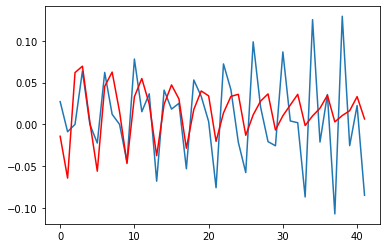

In [117]:
# Representamos el mejor modelo que hemos visto:
best_model_arima_predictions2 = model2.predict(n_puntos_test2)

plt.plot(test2)
plt.plot(best_model_arima_predictions2, color='red');
mean_squared_error(test2, best_model_arima_predictions2)

36.54802201153358

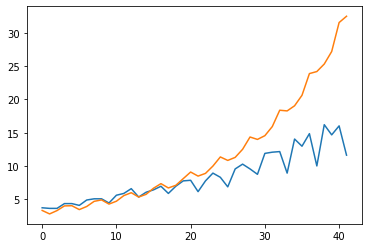

In [118]:
series_completa = pd.Series(train2).append(pd.Series(best_model_arima_predictions2)).reset_index(drop=True)

plt.plot(test)
final_prediction = inverse_loglog(series_completa, l1, l2, base_y2)[n_puntos_train2:].reset_index(drop=True)
final_prediction.plot();
mean_squared_error(test, final_prediction)

0.25801451175907986

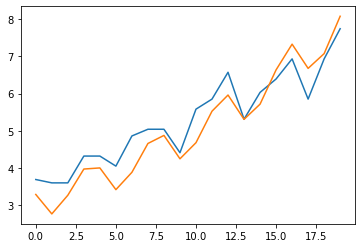

In [119]:
series_completa = pd.Series(train2).append(pd.Series(best_model_arima_predictions2)).reset_index(drop=True)

plt.plot(test[:20])
final_prediction = inverse_loglog(series_completa, l1, l2, base_y2)[n_puntos_train2:].reset_index(drop=True)
final_prediction[:20].plot();
mean_squared_error(test[:20], final_prediction[:20])

Sin embargo, podemos comprobar que era mejor el modelo anterior para predecir series con tendencia, ya que con la transformación estamos añadiendo más complejidad al modelo, y antes se encargaba de predecir además esa temporalidad.

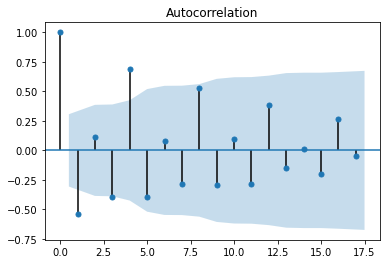

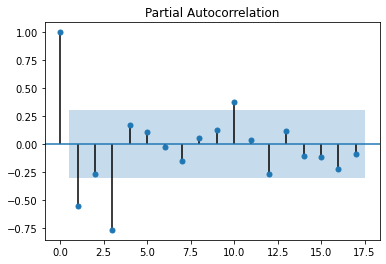

In [120]:
plot_acf(train2);
plot_pacf(train2);

### EJERCICIO

Probemos lo que acabamos de ver con el dataset del ejercicio anterior:
  1. Lee el dataset ``data/birthdays_year.csv``
  2. Divide los datos un 70% para train y un 30% para test
  3. Busca el mejor modelo ARIMA
  4. Predice el 30% de datos restante y represéntalo frente a los datos de test
  5. Calcula el MSE y el RMSE
  6. Prueba un modelo ARIMA añadiendo mayores límites para los valores, ¿qué observas?
  7. De los modelos que has diseñado, ¿cuál es mejor para este dataset: AR, MA o ARIMA?

In [296]:
df_ej_arima = pd.read_csv("data/birthdays_year.csv", parse_dates=['Date'], index_col='Date')
df_ej_arima.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [124]:
X_ej_arima = df_ej_arima['Births'].values

n_points_train_arima = int(len(X_ej_arima)*.7)
n_points_test_arima = len(X_ej_arima) - n_points_train_arima

train_ej_arima = X_ej_arima[:n_points_train_arima]
test_ej_arima = X_ej_arima[n_points_train_arima:]

In [125]:
model_ej_arima = auto_arima(train_ej_arima,
                  max_p=5,
                  max_q=5,
                  max_d=3, 
                  with_intercept=True,
                  trace=True,
                  stepwise=True)
print(model_ej_arima.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1869.861, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1805.833, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1867.875, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1784.887, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1771.923, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1762.979, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1758.445, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1756.596, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1761.096, Time=0.07 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1725.522, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1723.547, T

52.3702497884488

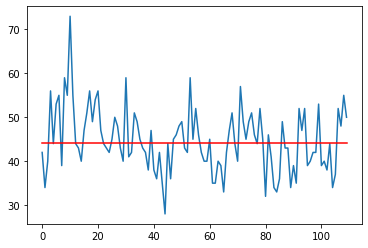

In [130]:
plt.plot(test_ej_arima)
plt.plot(model_ej_arima.predict(n_points_test_arima), 'red')
mean_squared_error(test_ej_arima, model_ej_arima.predict(n_points_test_arima))

In [131]:
X_ej_arima = df_ej_arima['Births'].values
# Calculamos los puntos de train y test:
n_puntos_train_ej_arima = int(len(df_ej_arima)*0.7)
n_puntos_test_ej_arima = len(df_ej_arima) - n_puntos_train_ej_arima
train_ej_arima = X_ej_arima[:n_puntos_train_ej_arima]
test_ej_arima = X_ej_arima[n_puntos_train_ej_arima:]

In [133]:
model = auto_arima(train_ej_arima,
                  max_p=5,
                  max_q=5,
                  max_d=3,
                  with_intercept=True,
                  trace=True,
                  stepwise=True,
              method='bfgs')
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1735.496, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1869.861, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1805.833, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1867.875, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1739.502, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1727.331, Time=0.93 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1742.731, Time=0.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1737.754, Time=0.83 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=1731.098, Time=2.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1728.656, Time=0.77 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=1730.849, Time=1.55 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1726.5

52.37028827429823

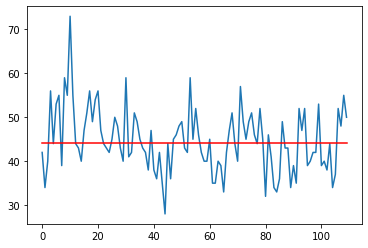

In [134]:
# Representamos el mejor modelo que hemos visto:
best_model_arima_predictions = model.predict(n_puntos_test_ej_arima)
plt.plot(test_ej_arima)
plt.plot(best_model_arima_predictions, color='red');
mean_squared_error(test_ej_arima, best_model_arima_predictions)

In [142]:
print(f"MSE: {mean_squared_error(test_ej_arima, best_model_arima_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_ej_arima, best_model_arima_predictions))}")

MSE: 52.37028827429823
RMSE: 7.2367318780163625


In [143]:
model = auto_arima(train_ej_arima,
                  max_p=20,
                  max_q=20,
                  max_d=6,
                  with_intercept=True,
                  trace=True,
                  stepwise=True,
              method='bfgs')
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1735.496, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1869.861, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1805.833, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1867.875, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1739.502, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1727.331, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1742.731, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1737.754, Time=0.67 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=1731.098, Time=1.58 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1728.656, Time=0.69 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=1730.849, Time=1.35 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1726.5

In [145]:
train_ej_arima

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

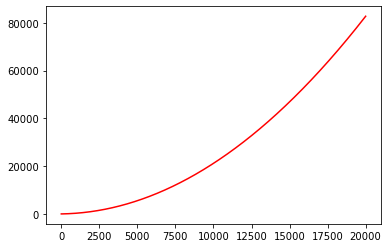

In [157]:
# Representamos el mejor modelo que hemos visto:
modelo_pruebas_arima_predicciones = modelo_pruebas_arima_fit.predict(20000)
plt.plot(modelo_pruebas_arima_predicciones, color='red');

### Comparación de modelos:

Ahora que hemos visto los modelos AR(p), MA(q) y ARIMA(p, d, q), veamos cómo se ha desenvuelto cada uno:

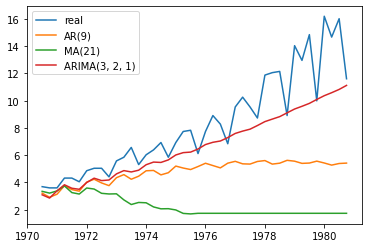

In [164]:
plt.plot(data['data'].iloc[-n_puntos_test:].index, test, label='real')

best_model_ar = ARIMA(order=(11, 0, 0))
best_model_ar_fit = best_model_ar.fit(train)
best_model_ar_predictions = best_model_ar_fit.predict(n_puntos_test)
plt.plot(data['data'].iloc[-n_puntos_test:].index, best_model_ar_predictions, label='AR(9)')

best_model_ma = ARIMA(order=(0, 0, 21))
best_model_ma_fit = best_model_ma.fit(train)
best_model_ma_predictions = best_model_ma_fit.predict(n_puntos_test)
plt.plot(data['data'].iloc[-n_puntos_test:].index, best_model_ma_predictions, label='MA(21)')

best_model_arima = ARIMA(order=(3, 2, 1))
best_model_arima_fit = best_model_arima.fit(train)
best_model_arima_predictions = best_model_arima_fit.predict(n_puntos_test)
plt.plot(data['data'].iloc[-n_puntos_test:].index, best_model_arima_predictions, label='ARIMA(3, 2, 1)')

plt.legend();

In [ ]:
plt.plot(best_model_ar.predict(2000))

## ARIMAX

La X viene de *exogenous*. Significa que le podemos añadir una variable externa con la que entrenar el modelo.

Vamos a probar con los datos de la bolsa. Primero, un ``auto_arima`` con los datos a cierre. Y después, un auto_arima acompañado de los datos de apertura de bolsa, a ver cuánto ayudan a predecir el cierre.

In [169]:
stock_df = pd.read_csv('data/FB.csv', parse_dates = ['Date'], index_col='Date')
print(len(stock_df))
stock_df.head(20)

1259


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100


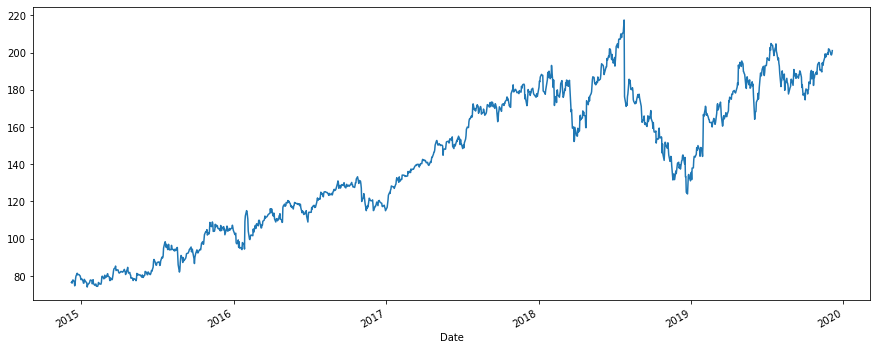

In [170]:
stock_df['Close'].plot(figsize=(15,6));

Veremos primero un ejemplo sin variable exógena:

In [171]:
n_puntos_train = 1240
n_puntos_test = len(stock_df['Close']) - n_puntos_train

train = stock_df['Close'][:n_puntos_train].values
test = stock_df['Close'][n_puntos_train:].values

Vamos a probar varios modelos ARIMA, a ver cuál sería la mejor combinación de hiperparámetros.

In [172]:
stepwise_model = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=3,
                            max_p=5,
                            max_q=5,
                            stationary=False,
                            trace=True,
                            stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.29 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.584 seconds
5973.07958068662


Ya lo tenemos, ahora montaremos el modelo con esos hiperparámetros y veremos qué AIC tiene.

In [173]:
model_arima = ARIMA(order=(1,1,1))
model_arima.fit(train)
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Tue, 16 Mar 2021   AIC                           5973.080
Time:                        20:08:35   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.066      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.020      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.985      0.0

mean_squared_error: 45.026333984336645
root mean_squared_error: 6.71016646472624


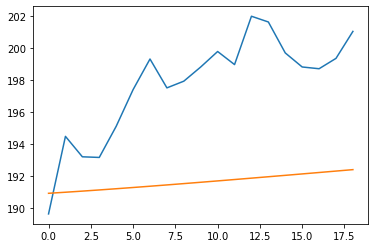

In [176]:
predictions_arima = model_arima.predict(n_puntos_test)

plt.plot(test)
plt.plot(predictions_arima)

print("mean_squared_error:", mean_squared_error(test, predictions_arima))
print("root mean_squared_error:", np.sqrt(mean_squared_error(test, predictions_arima)))

Vamos ahora a compararlo con el mismo modelo, pero en este caso le añadimos una variable exógena al entrenamiento:

In [181]:
model_arimax = ARIMA(order=(1,1,1))
model_arimax.fit(train,
         exogenous=stock_df['Open'][:n_puntos_train].values.reshape(-1,1))
print(model_arimax.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2601.451
Date:                Tue, 16 Mar 2021   AIC                           5212.901
Time:                        20:12:09   BIC                           5238.511
Sample:                             0   HQIC                          5222.533
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.031      0.303      -0.000       0.001
x1             0.9972      0.003    386.756      0.000       0.992       1.002
ar.L1         -0.1288      0.024     -5.445      0.0

Como podemos comprobar, se reduce bastante el AIC.

Probemos a entrenar el ``auto_arima`` con la variable exógena (parámetro ``exogenous``):

In [192]:
best_model_arimax = auto_arima(train,
                               max_p=5,
                               max_q=5,
                               max_d=3,
                               stationary=False,
                               trace=True,
                               stepwise=True,
                               exogenous = stock_df['Open'][:1240].values.reshape(-1,1))

print(best_model_arimax.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4077.184, Time=2.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4733.379, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4453.973, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4086.215, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4731.700, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4090.146, Time=1.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4077.060, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4082.122, Time=1.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4265.464, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4075.150, Time=2.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4201.107, Time=0.56 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4076.431, Time=2.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4076.730, Time=2.66 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4177.095, Time=0.77 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

Predecimos:

In [183]:
best_predictions_arimax = best_model_arimax.predict(19, exogenous=stock_df[['Open']].iloc[n_puntos_train:])
print("mean_squared_error:", mean_squared_error(test, best_predictions_arimax))
print("root mean_squared_error:", np.sqrt(mean_squared_error(test, best_predictions_arimax)))

mean_squared_error: 2.6890816025194417
root mean_squared_error: 1.6398419443712988


Y comprobamos los resultados:

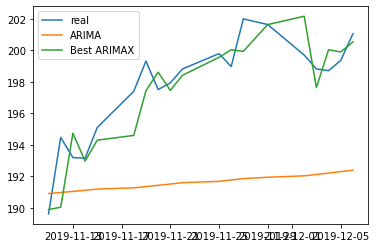

In [184]:
plt.plot(stock_df.iloc[n_puntos_train:].index, test, label='real')
plt.plot(stock_df.iloc[n_puntos_train:].index, predictions_arima, label='ARIMA')
plt.plot(stock_df.iloc[n_puntos_train:].index, best_predictions_arimax, label='Best ARIMAX')

plt.legend();

### EJERCICIO

Ya que lo hemos visto con una, probemos a utilizar diferentes variables exógenas. Para ello, simplemente le deberás pasar el DataFrame con las nuevas variables a nuestro ``auto_arima`` mediante el parámetro ``exogenous``.
  1. Partiendo del dataframe completo, divide los datos en train y test con unos porcentajes de 70% y 30%, respectivamente
  2. Identifica el mejor modelo ARIMA para esos datos
  3. Identifica el mejor modelo ARIMAX con solo 1 variable exógena
  4. Identifica el mejor modelo ARIMAX con 2 variables exógenas
  5. Compara los resultados obtenidos mediante la representación gráfica
  6. Compara los resultados obtenidos mediante RMSE

In [269]:
stock_df = pd.read_csv('data/FB.csv', parse_dates = ['Date'], index_col='Date')
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [270]:
X2 = stock_df['Close'].values
n_puntos_train = int(len(X2)*0.7)
n_puntos_test = len(X2) - n_puntos_train

train = X2[:n_puntos_train]
test = X2[n_puntos_train:]

In [271]:
model_arima = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=3,
                            max_p=5,
                            max_q=5,
                            with_intercept=True,
                            trace=True,
                            stepwise=True)
print(model_arima.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3751.981, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3759.705, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3761.626, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3761.613, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3761.089, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3752.984, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3752.913, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3758.949, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3759.544, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3753.243, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.013 seconds
3751.981450744032


mean_squared_error: 1787.585269422304
root mean_squared_error: 42.27984471852166


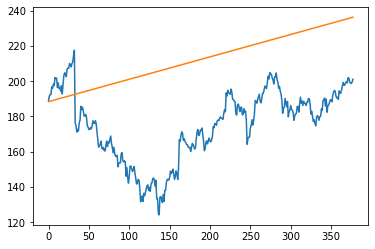

In [272]:
predictions_arima = model_arima.predict(n_puntos_test)
plt.plot(test)
plt.plot(predictions_arima)
print("mean_squared_error:", mean_squared_error(test, predictions_arima))
print("root mean_squared_error:", np.sqrt(mean_squared_error(test, predictions_arima)))

In [273]:
model_arimax = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=3,
                            max_p=5,
                            max_q=5,
                            with_intercept=True,
                            trace=True,
                            stepwise=True, 
                            exogenous = stock_df['Open'][:n_puntos_train].values.reshape(-1,1))
print(model_arimax.aic())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3348.415, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3362.945, Time=0.79 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3361.526, Time=0.59 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3360.827, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3361.084, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3358.486, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3356.225, Time=0.86 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3354.954, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3356.485, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3352.705, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3346.036, Time=0.73 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3358.793, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3359.542, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3356.495, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]          

In [277]:
new_df = stock_df.copy()

new_df['High_last'] = new_df['High'].shift()
new_df['Low_last'] = new_df['Low'].shift()

new_df = new_df.dropna()

X3 = new_df['Close'].values
n_puntos_train2 = int(len(X3)*0.7)
n_puntos_test2 = len(X3) - n_puntos_train2

train2 = X3[:n_puntos_train2]
test2 = X3[n_puntos_train2:]

In [284]:
model_arimax_2 = auto_arima(train2,
                               max_p=10,
                               max_q=10,
                               max_d=10,
                               stationary=False,
                               trace=True,
                               stepwise=True,
                               exogenous = new_df[['High_last', 'Low_last']][:n_puntos_train2].values.reshape(-1, 2))
print(model_arimax_2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3815.158, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3883.731, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3840.564, Time=0.45 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3823.763, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3882.349, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3817.446, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3818.850, Time=0.79 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3822.811, Time=1.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3820.042, Time=1.84 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3819.934, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3819.302, Time=1.84 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3821.436, Time=1.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3819.611, Time=2.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3813.366, Time=1.69 sec
 ARIMA(1,0,2)(0,0,0)[0]          

3.8891986343538125


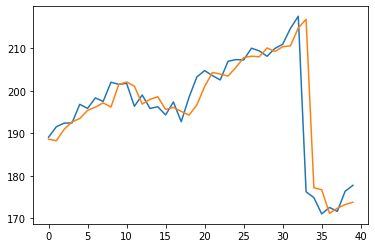

In [295]:
preds = model_arimax_2.predict(len(test2), exogenous=new_df[['High_last', 'Low_last']][n_puntos_train2:].values.reshape(-1, 2))
preds

plt.plot(test2[:40])
plt.plot(preds[:40])
print(mean_squared_error(test2, preds)**(1/2))

## SARIMA

En el caso de presentar estacionalidad, es decir, que cuentan con un patrón que se repite a lo largo del tiempo; los datos pueden tratarse con un modelo SARIMA:

In [471]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


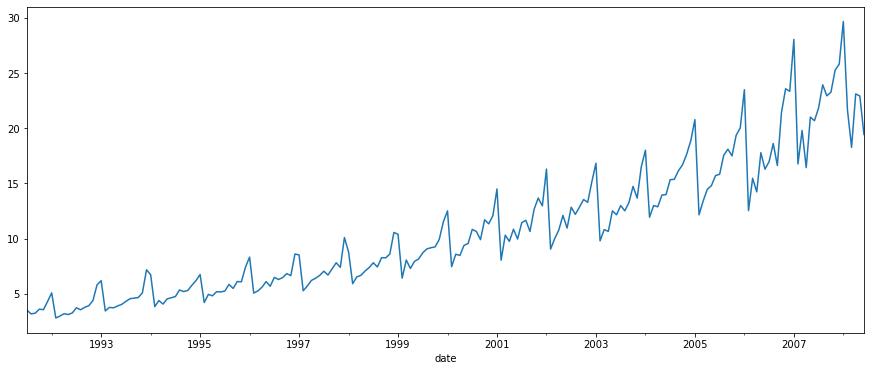

In [472]:
df['value'].plot(figsize=(15,6));

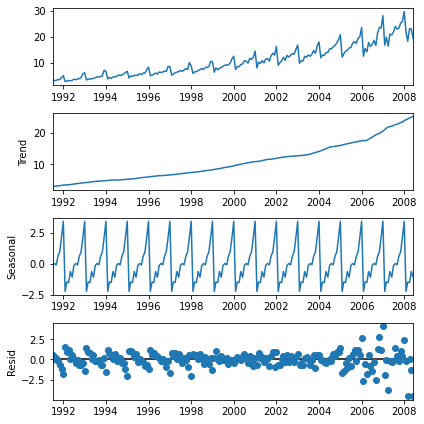

In [473]:
result_add = seasonal_decompose(df[['value' ]], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();

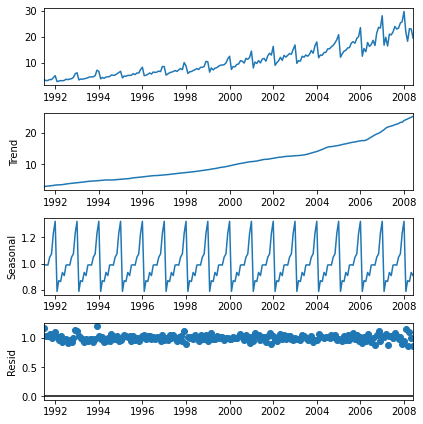

In [474]:
result_mul = seasonal_decompose(df[['value' ]], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

In [475]:
X = df[['value']]
train = X[:-20]
test = X[-20:]

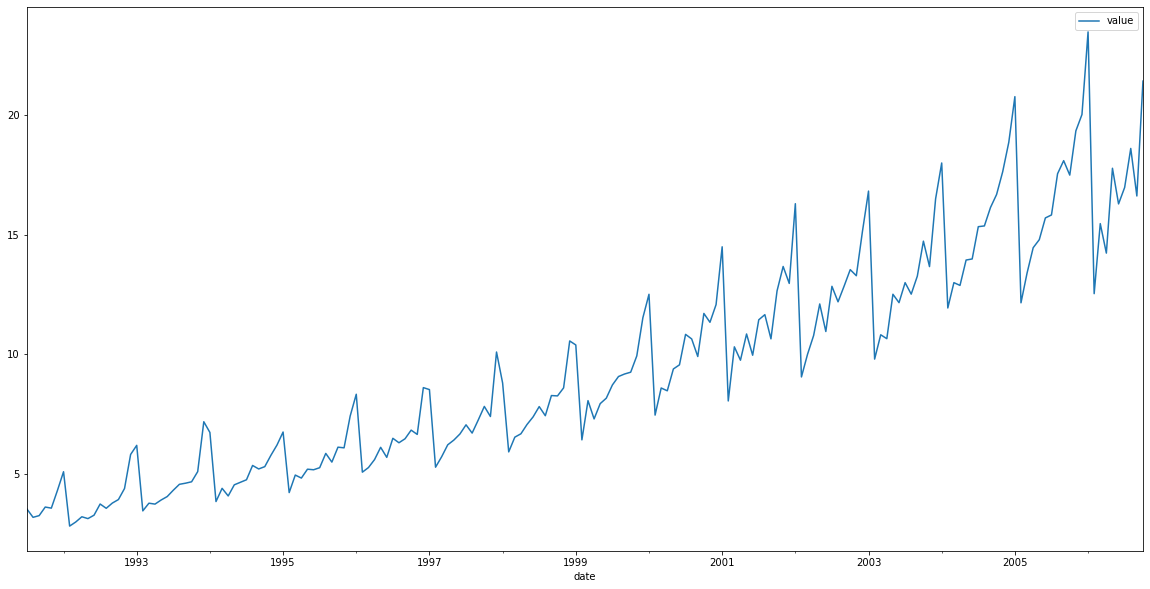

In [485]:
train.plot(figsize=(20, 10))

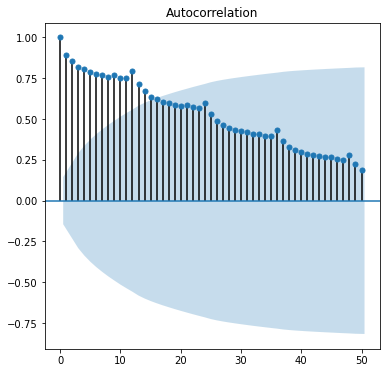

In [476]:
plot_acf(train, lags=50);

Probemos el auto arima sin indicarle que hay componente de seasonality:

In [325]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                   with_intercept=True,
                    trace=True,
                    stepwise=True,
                    random_state=42)

print(model.aic())

predictions_no_season = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions_no_season))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=698.391, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=764.142, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.394, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.405, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=762.612, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=700.332, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=700.362, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.998, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=736.404, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=695.600, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=697.194, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=697.299, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=700.821, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=699.306, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=689.9

In [312]:
print("root mean squared error:", np.sqrt(mean_squared_error(test, predictions_no_season)))

root mean squared error: 4.637352585116349


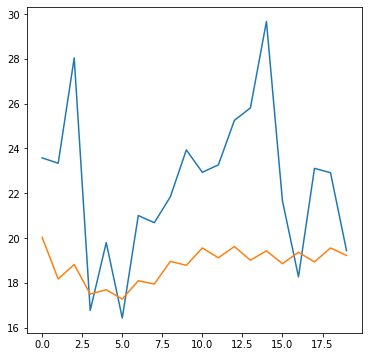

In [317]:
plt.plot(test.values)
plt.plot(predictions)

Ahora le añadimos el componente seasonality mediante el parámetro `m`, que en este caso serán los 12 meses:

In [330]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m=12,
                    seasonal=True,
                    trace=True,
                    stepwise=True,
                    random_state=42,
                  method='bfgs')


print(model.aic())

predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=359.383, Time=1.01 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=480.967, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=391.380, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=366.538, Time=0.55 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=357.778, Time=0.58 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=367.053, Time=0.10 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=358.591, Time=4.23 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=361.813, Time=0.35 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=357.611, Time=13.25 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=356.290, Time=3.56 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=354.319, Time=2.66 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=353.117, Time=1.43 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=362.795, Time=1.50 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=378.264, Time=0.67 sec
 ARIMA(2,1,1)(2,1,0)[12]        

In [319]:
print("root mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

root mean_squared_error: 3.1632045175328263


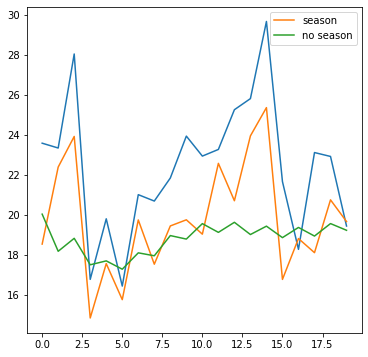

In [327]:
plt.plot(test.values)
plt.plot(predictions, label='season')
plt.plot(predictions_no_season, label='no season')
plt.legend()

Como se puede comprobar, hemos conseguido mejorar el resultado respecto al resto de modelos.

### EJERCICIO

Ahora, vamos a probar el modelo que acabamos de ver:
  1. Lee el dataset ``data/currency.csv``
  2. Divide los datos en train/test en un 60%/40%
  3. Diseña un modelo SARIMA que mejor AIC devuelva (puedes utilizar auto_arima con 'bfgs')
  4. Predice y representa esos valores frente a los originales
  5. ¿Cuánto es el RMSE?

In [490]:
df = pd.read_csv("data/currency.csv", parse_dates=['Time'], index_col='Time')
df.index

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10',
               ...
               '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-24'],
              dtype='datetime64[ns]', name='Time', length=300, freq=None)

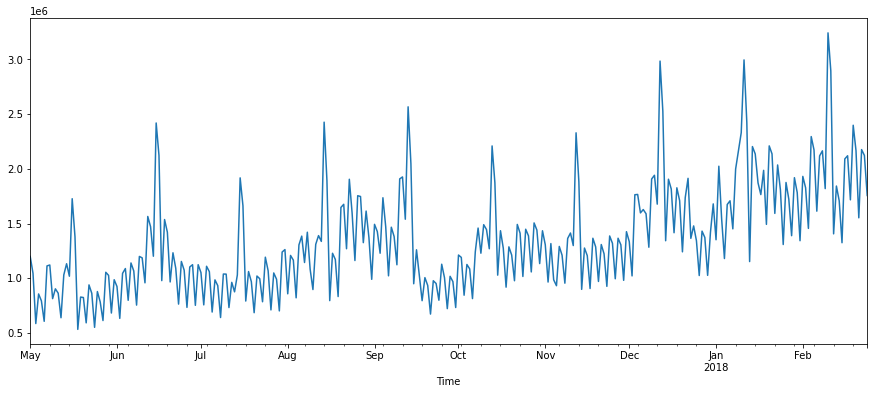

In [491]:
df['GEMS_GEMS_SPENT'].plot(figsize=(15,6))

In [ ]:
plot_acf(df['GEMS_GEMS_SPENT'], lags=31)

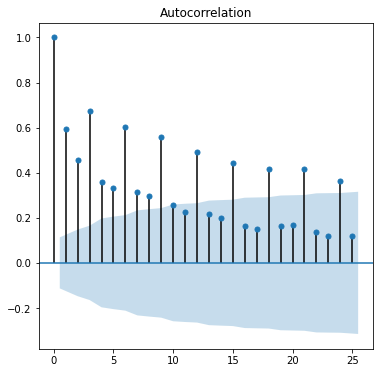

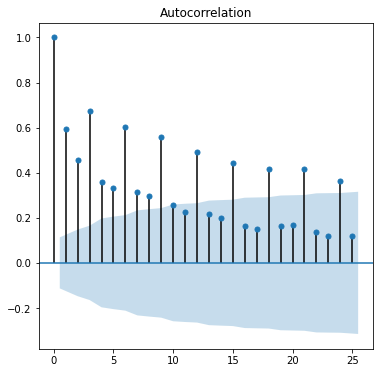

In [493]:
plot_acf(df['GEMS_GEMS_SPENT'])

In [494]:
X = df[['GEMS_GEMS_SPENT']].values

n_puntos_train = int(len(X)*0.7)
n_puntos_test = len(X) - n_puntos_train

train = X[:-n_puntos_test]
test = X[-n_puntos_test:]

In [495]:
len(train)

210

In [496]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m=30,
                    with_intercept=True,
                    seasonal=True,
                    trace=True,
                    stepwise=True)


print(model.aic())

predictions = model.predict(n_puntos_test)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=5822.903, Time=2.55 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=5981.263, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=5832.677, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=5869.817, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=5979.267, Time=0.01 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=5859.305, Time=0.83 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=5830.104, Time=0.98 sec
 ARIMA(1,1,1)(2,0,1)[30] intercept   : AIC=5824.849, Time=8.12 sec
 ARIMA(1,1,1)(1,0,2)[30] intercept   : AIC=5826.632, Time=16.55 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=5916.901, Time=0.09 sec
 ARIMA(1,1,1)(0,0,2)[30] intercept   : AIC=5849.050, Time=4.76 sec
 ARIMA(1,1,1)(2,0,0)[30] intercept   : AIC=5826.486, Time=5.89 sec
 ARIMA(1,1,1)(2,0,2)[30] intercept   : AIC=inf, Time=16.62 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=5837.931, Time=1.30 sec
 ARIMA(1,1,0)(1,0,1)[3

KeyboardInterrupt: 

In [387]:
pred_3 = model.predict(n_puntos_test)

In [388]:
# print("mean_squared_error:", mean_squared_error(test, pred_4))
print("mean_squared_error:", mean_squared_error(test, pred_3))

mean_squared_error: 158858033318.68784


In [390]:

print("root_mean_squared_error:", mean_squared_error(test, pred_3)**(1/2))

root_mean_squared_error: 398569.9854714199


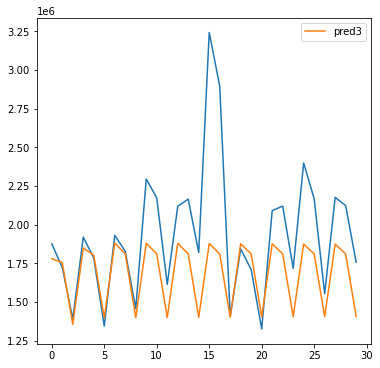

In [389]:
plt.plot(test)
# plt.plot(pred_4, label='pred4')
plt.plot(pred_3, label='pred3')
plt.legend()

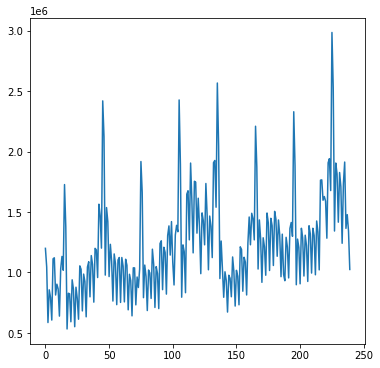

In [383]:
plt.plot(train)

In [371]:
model_arima = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                   with_intercept=True,
                    trace=True,
                    stepwise=True)


print(model_arima.aic())

predictions_arima = model_arima.predict(n_puntos_test)
print("mean_squared_error:", mean_squared_error(test, predictions_arima))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5071.566, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5124.403, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5107.020, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5076.384, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5122.406, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4940.955, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5017.010, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4933.320, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4974.251, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4897.638, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4897.728, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4899.612, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=4

In [368]:
print("mean_squared_error:", mean_squared_error(test, pred_4))
print("mean_squared_error:", mean_squared_error(test, pred_3))

mean_squared_error: 270883055646.74387
mean_squared_error: 325151679646.97577


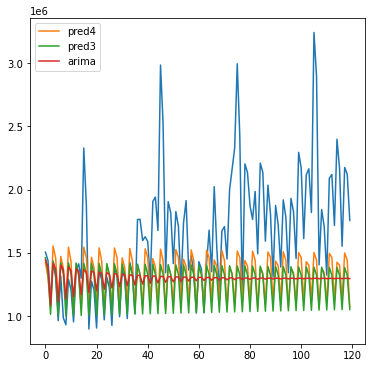

In [373]:
plt.plot(test)
plt.plot(pred_4, label='pred4')
plt.plot(pred_3, label='pred3')
plt.plot(predictions_arima, label='arima')
plt.legend()

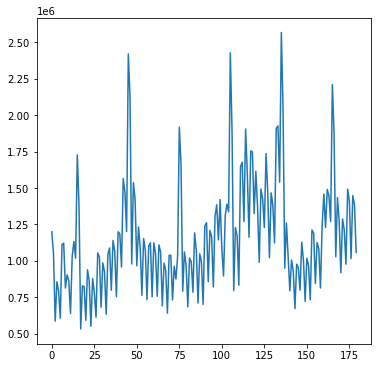

In [374]:
plt.plot(train)

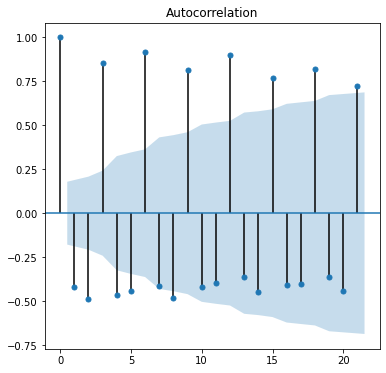

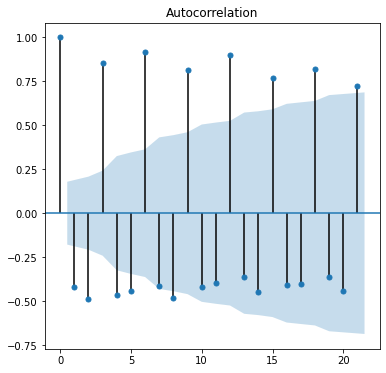

In [370]:
plot_acf(pred_4)

### EJERCICIO

Lee el DataFrame de acciones de Google (``data/GOOG.csv``) y compara los modelos que hemos descrito en este notebook para predecir el cierre da cada día:
1. Separa en train/test de modo que nos quede un 20% para test
2. Crea el mejor modelo AR que puedas
3. Diseña el mejor modelo MA
4. Utiliza el mejor modelo ARIMA
5. Utiliza un modelo SARIMA

Piensa en qué variable exógena podrías utilizar en tu dataset:

6. Utiliza un modelo ARIMA con esa variable exógena
7. Utiliza un modelo SARIMA con esa variable exógena

¿Se te ocurre alguna variable más que pudieras utilizar?

8. Diseña un modelo que utilice más de una variable exógena y predice con él
9. Compara gráficamente todos los modelos diseñados en este ejercicio

In [108]:
df = pd.read_csv("data/GOOG.csv", parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...,...
2513,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2514,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2515,2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800
2516,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600


In [109]:
serie_temp = pd.date_range(df['Date'].min(), df['Date'].max())
serie_temp

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01',
               '2020-01-02', '2020-01-03'],
              dtype='datetime64[ns]', length=3652, freq='D')

In [110]:
df_temp = pd.DataFrame({'Date': serie_temp})
df_temp

,Date
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3647,2019-12-30
3648,2019-12-31
3649,2020-01-01
3650,2020-01-02


In [111]:
df_new = df_temp.merge(df, on='Date', how='left')
df_new.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3647,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900.0
3648,2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800.0
3649,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3650,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600.0
3651,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400.0


In [112]:
df2 = df_new.ffill()
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3647,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900.0
3648,2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800.0
3649,2020-01-01,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800.0
3650,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600.0
3651,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400.0


In [113]:
df2 = df2.set_index('Date')

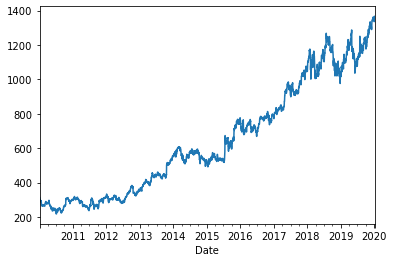

In [114]:
df2['Close'].plot()

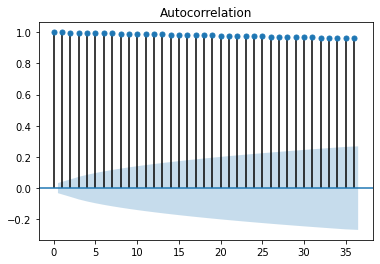

In [115]:
plot_acf(df2['Close']);

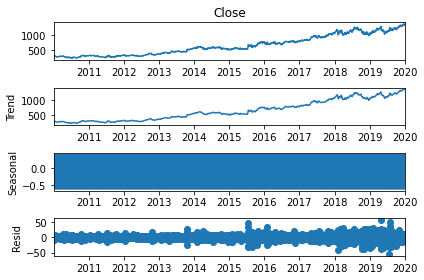

In [116]:
seasonal_decompose(df2['Close'], model='additive').plot();

In [117]:
X = df2['Close'].values

# Calculamos los puntos de train y test:
n_puntos_train = int(len(X)*0.8)
n_puntos_test = len(X) - n_puntos_train

# También nos creamos una serie de puntos para predecir a corto. Normalmente, esto no se hace, simplemente lo haremos aquí para observar y entender
#el efecto del modelo:
train = X[:n_puntos_train]
test = X[n_puntos_train:]

In [118]:
train

array([ 312.204773,  310.829926,  302.994293, ..., 1046.400024,
       1046.400024, 1065.      ])

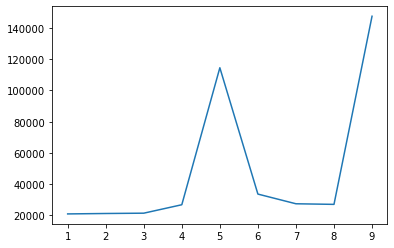

In [119]:
lags = []
mse_ar = []
for lag in range(1, 10):
    try:
        model_ar = ARIMA(order=(lag, 0, 0))
        model_ar_fit = model_ar.fit(train)
        predictions_ar = model_ar_fit.predict(n_puntos_test)
        lags.append(lag)
        mse_ar.append(mean_squared_error(test, predictions_ar))
    except:
        continue
    
plt.plot(lags, mse_ar);

In [120]:
model_ar = ARIMA(order=(1, 0, 0))
model_ar_fit = model_ar.fit(train)
predictions_ar = model_ar_fit.predict(n_puntos_test)

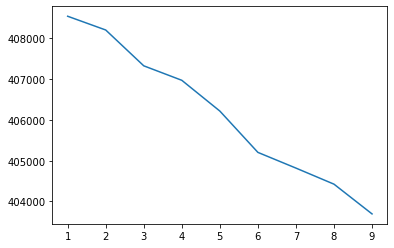

In [121]:
lags = []
mse_ma = []
for lag in range(1, 10):
    try:
        model_ma = ARIMA(order=(0, 0, lag))
        model_ma_fit = model_ma.fit(train)
        predictions_ma = model_ma_fit.predict(n_puntos_test)
        lags.append(lag)
        mse_ma.append(mean_squared_error(test, predictions_ma))
    except:
        continue
    
plt.plot(lags, mse_ma);

In [122]:
model_ma = ARIMA(order=(0, 0, 9))
model_ma_fit = model_ma.fit(train)
predictions_ma = model_ma_fit.predict(n_puntos_test)

In [123]:
model_arima = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                   with_intercept=True,
                    trace=True,
                    stepwise=True)


print(model_arima.aic())

predictions_arima = model_arima.predict(n_puntos_test)
print("mean_squared_error:", mean_squared_error(test, predictions_arima))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19009.772, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19007.386, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19008.130, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19008.151, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19010.326, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.373 seconds
19007.386142282947
mean_squared_error: 4788.370578184818


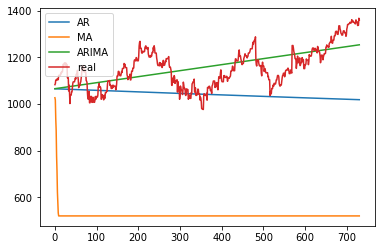

In [124]:
plt.plot(predictions_ar, label='AR')
plt.plot(predictions_ma, label='MA')
plt.plot(predictions_arima, label='ARIMA')
plt.plot(test, label='real')
plt.legend()

In [125]:
best_model_arimax = auto_arima(train,
                               max_p=5,
                               max_q=5,
                               max_d=3,
                               stationary=False,
                               trace=True,
                               stepwise=True,
                               exogenous = df2['Open'][:n_puntos_train].values.reshape(-1,1))

print(best_model_arimax.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=18332.219, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18738.991, Time=0.88 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18366.098, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18458.825, Time=1.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18738.634, Time=1.35 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=18331.753, Time=1.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=18337.237, Time=3.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=18345.223, Time=0.98 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=18333.402, Time=2.68 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=18334.272, Time=1.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=18332.200, Time=0.58 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=18334.497, Time=1.85 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=18329.879, Time=1.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=18335.341, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0

In [126]:
predictions_arimax = best_model_arimax.predict(n_puntos_test, exogenous=df2['Open'][n_puntos_train:].values.reshape(-1,1))

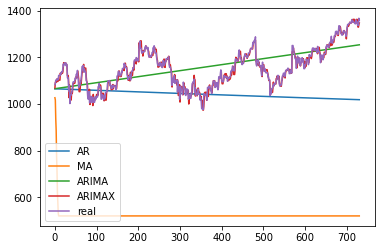

In [127]:
plt.plot(predictions_ar, label='AR')
plt.plot(predictions_ma, label='MA')
plt.plot(predictions_arima, label='ARIMA')
plt.plot(predictions_arimax, label='ARIMAX')
plt.plot(test, label='real')
plt.legend()

### EXTRA

Has visto el efecto de la variable exógena, pero también te has dado cuenta de que estamos haciendo trampas en cierto modo, ya que estamos comparando predicciones con horizontes temporales muy distintos. No es lo mismo predecir 731 puntos como estamos haciendo con los modelos AR, MA y ARIMA, que hacerlo de 1 en 1, como estamos haciendo de forma indirecta con el modelo ARIMAX, ya que la variable extra no la tendremos hasta el día anterior.

Por lo tanto, para equiparar estos modelos, vamos a simular el resultado con una variable exógena de la que sí podamos disponer en un horizonte temporal suficientemente grande:

1. Desfasa la variable exógena tantos puntos como estemos utilizando para predecir
2. Estamos intentando predecir un horizonte demasiado largo, ¿qué pasaría si intentamos predecir 1 año?
3. Visualiza la predicción, el test y la parte de la variable exógena que se utiliza para test, y trata de obtener explicación a los resultados

In [3]:
df = pd.read_csv("data/GOOG.csv", parse_dates=['Date'])
serie_temp = pd.date_range(df['Date'].min(), df['Date'].max())
serie_temp
df_temp = pd.DataFrame({'Date': serie_temp})
df_temp
df_new = df_temp.merge(df, on='Date', how='left')
df_new.tail()
df2 = df_new.ffill()
df2.tail()
df2 = df2.set_index('Date')

In [152]:
df3 = df2.copy()

In [153]:
df3['Open_lag'] = df3['Open'].shift(n_puntos_test)
df3 = df3.dropna()

In [154]:
n_puntos_test = 731 # obtenido del apartado anterior
n_puntos_train = len(df3) - n_puntos_test

In [155]:
train = df3['Close'].values[:-n_puntos_test]
test = df3['Close'].values[-n_puntos_test:]

In [156]:
model_arimax = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    with_intercept=True,
                    trace=True,
                    stepwise=True,
                    exogenous = df3['Open_lag'][:-n_puntos_test].values.reshape(-1,1))


print(model_arimax.aic())

predictions_arimax = model_arimax.predict(n_puntos_test, exogenous=df3['Open_lag'][-n_puntos_test:].values.reshape(-1,1))
print("mean_squared_error:", mean_squared_error(test, predictions_arimax))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14637.315, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14635.007, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14635.318, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14635.319, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14638.151, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.000 seconds
14635.007116056891
mean_squared_error: 6490.6765169013015


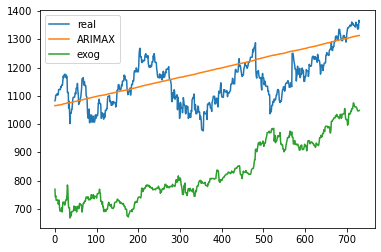

In [149]:
plt.plot(test, label='real')
plt.plot(predictions_arimax, label='ARIMAX')
plt.plot(df3['Open_lag'][-n_puntos_test:].values.reshape(-1,1), label='exog')
# plt.plot(df3['Open'][-n_puntos_test:].values.reshape(-1,1), label='exog_sin_lag')
plt.legend()

In [150]:
model_arimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2190
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7314.504
Date:                Fri, 19 Mar 2021   AIC                          14635.007
Time:                        18:49:48   BIC                          14652.081
Sample:                             0   HQIC                         14641.248
                               - 2190                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3315      0.153      2.169      0.030       0.032       0.631
x1             0.0224      0.019      1.200      0.230      -0.014       0.059
sigma2        46.7629      0.407    114.866      0.000      45.965      47.561
===================================================================================
Ljung-Box (Q):                       59.60   Jarque-Bera (JB):             54997.26
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
print(f"RMSE: {mean_squared_error(test, predictions_arimax)**(1/2)}")

RMSE: 80.56473494588872


In [ ]:
#2 extra

In [193]:
df = pd.read_csv("data/GOOG.csv", parse_dates=['Date'])
serie_temp = pd.date_range(df['Date'].min(), df['Date'].max())
serie_temp
df_temp = pd.DataFrame({'Date': serie_temp})
df_temp
df_new = df_temp.merge(df, on='Date', how='left')
df_new.tail()
df2 = df_new.ffill()
df2.tail()
df2 = df2.set_index('Date')

In [194]:
df3 = df2.copy()

In [195]:
n_puntos_test = 365 # nueva definición
n_puntos_train = len(df3) - n_puntos_test

In [196]:
df3['Open_lag'] = df3['Open'].shift(n_puntos_test)
df3['High_lag'] = df3['High'].shift(n_puntos_test)
df3 = df3.dropna()

In [197]:
train = df3['Close'].values[:-n_puntos_test]
test = df3['Close'].values[-n_puntos_test:]

In [198]:
model_arimax2 = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    with_intercept=True,
                    trace=True,
                    stepwise=True,
                    exogenous = df3[['Open_lag', 'High_lag']][:-n_puntos_test].values.reshape(-1,2))


print(model_arimax2.aic())

predictions_arimax2 = model_arimax2.predict(n_puntos_test, exogenous=df3[['Open_lag', 'High_lag']][-n_puntos_test:].values.reshape(-1,2))
print("mean_squared_error:", mean_squared_error(test, predictions_arimax2))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20689.974, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20686.417, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20688.110, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20688.093, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20686.913, Time=0.80 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.061 seconds
20686.41723753183
mean_squared_error: 21214.538281166377


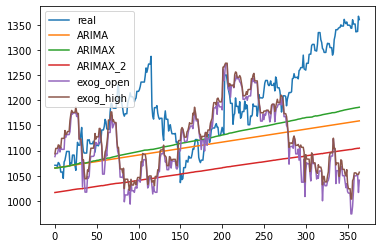

In [201]:
plt.plot(test, label='real')
plt.plot(predictions_arima[:n_puntos_test], label='ARIMA')
plt.plot(predictions_arimax[:n_puntos_test], label='ARIMAX')
plt.plot(predictions_arimax2, label='ARIMAX_2')
plt.plot(df3['Open_lag'][-n_puntos_test:].values.reshape(-1,1), label='exog_open')
plt.plot(df3['High_lag'][-n_puntos_test:].values.reshape(-1,1), label='exog_high')
# plt.plot(df3['Open'][-n_puntos_test:].values.reshape(-1,1), label='exog_sin_lag')
plt.legend()

In [200]:
model_arimax2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2922
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -10339.209
Date:                Fri, 19 Mar 2021   AIC                          20686.417
Time:                        19:12:31   BIC                          20710.336
Sample:                             0   HQIC                         20695.032
                               - 2922                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2435      0.155      1.574      0.115      -0.060       0.547
x1             0.0104      0.035      0.296      0.767      -0.059       0.079
x2            -0.0057      0.037     -0.154      0.878      -0.078       0.067
sigma2        69.5016      0.602    115.522      0.000      68.322      70.681
===================================================================================
Ljung-Box (Q):                      125.29   Jarque-Bera (JB):             33078.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.86   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Otros modelos

Así como existen los modelos de regresión que acabamos de ver, la familia ARIMA, también es posible aplicar técnicas de Machine Learning a este tipo de modelos. Para ello, haremos algo semejante a lo que hace el modelo AR, crearnos unas cuántas columnas con desfases temporales de la serie temporal y utilizarlas para predecir.

Después, lo único que deberíamos hacer es tratar el problema como si de uno de regresión se tratara, para lo que podremos aplicar los algoritmos supervisados que hemos visto que nos apetezcan.

**IMPORTANTE**: Recuerda que tienes que separar los datos en train y test como se hace en las series temporales, respetando el orden temporal.


Y no sólo eso, sino que no podrás predecir como hemos hecho siempre. Si lo que haces es crearte las variables desfasando la original, estarás necesitando actualizar los valores reales en cada predicción, cosa que no se puede hacer para predecir a futuro (salvo que solo tengas una muestra en el horizonte temporal de predicción).

Si queremos predecir algo más (como suele ser el caso), necesitaremos crearnos una función para predecir que vaya utilizando los valores que se van prediciendo para realimentar los diferentes desfases, pues no tendrás noción de la realidad cuando vayas prediciendo.

### EJERCICIO

Sobre este último DataFrame, investiga para conseguir un modelo que mejore el que has conseguido en el apartado anterior utilizando las técnicas que hemos visto en capítulos anteriores (modelos lineales, árboles de decisión, ensembles, pipelines con GridSearchCV...). Utilizaremos un algoritmo de regresión para predecir la columna 'Close' con desfases temporales suyos. Para ello, debemos crear una función que haga la predicción del siguiente valor en base a lo que ha predicho en el anterior. Es decir, no podremos hacer una predicción al uso como hemos hecho otras veces, deberemos predecir valor a valor actualizando las columnas con los valores desfasados de lo que vayamos prediciendo en vez de tomar los datos de test.

1. Crea una función que reciba un modelo, un número de puntos a predecir, y train. Esta función deberá iterar tantas veces como puntos a predecir tengamos, entrenando el modelo con train + los puntos predichos hasta ese momento (empezando por 0), y obteniendo una única predicción. Después, deberemos añadir la predicción a train y obtener los lags como desfases del resto de columnas. (Puedes probarla con un DataFrame pequeño y un modelo sencillo, haciendo 3 predicciones y comprobando que te sale lo mismo que si lo haces separado).
2. Utiliza esta función con diversos modelos y comprueba qué te sale para un número de puntos equivalente a los utilizados anteriormente.
3. Prueba añadiendo desfases de las otras columnas para ver si mejora el modelo. Esto será como las variables exógenas de los modelos ARIMAX, por lo que tendremos que tener el mismo cuidado (consideraciones) que aplicamos con ellas (disponer temporalmente de los datos antes de calcular cierto horizonte temporal).
4. Prueba con un horizonte temporal más pequeño.

*NOTA*: Para utilizar GridSearchCV, tendrás que respetar la separación temporal, para lo que podemos utilizar ``TimeSeriesSplit``:
```Python
from sklearn.model_selection import TimeSeriesSplit

time_cv = TimeSeriesSplit(n_splits=10)
```

Consulta la documentación para conocer más sobre cómo utilizar este ["generador de CV para series temporales"](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html)

In [6]:
df = pd.read_csv("data/GOOG.csv", parse_dates=['Date'])
serie_temp = pd.date_range(df['Date'].min(), df['Date'].max())
serie_temp
df_temp = pd.DataFrame({'Date': serie_temp})
df_temp
df_new = df_temp.merge(df, on='Date', how='left')
df2 = df_new.ffill()
df2 = df2.set_index('Date')

In [7]:
n_puntos_train = 1000
n_puntos_test = 10
dfp = df2.copy().iloc[:n_puntos_train][['Close']]

In [11]:
# dfp['lag_1'] = dfp['Close'].shift(1)
# dfp['lag_2'] = dfp['Close'].shift(2)
# dfp['lag_3'] = dfp['Close'].shift(3)
# dfp['lag_4'] = dfp['Close'].shift(4)

# Alternativa (vago):
n_lags = 11
for i in range(1, n_lags+1):
    dfp[f'lag_{i}'] = dfp['Close'].shift(i)

dfp = dfp.dropna()
train = dfp.reset_index(drop=True)
train

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
0,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530,263.980530,263.980530,266.147400
1,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530,263.980530,263.980530
2,266.227112,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530,263.980530
3,267.198486,266.227112,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530
4,265.564606,267.198486,266.227112,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771
...,...,...,...,...,...,...,...,...,...,...,...,...
960,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368,353.514954,353.514954,353.514954
961,375.323212,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368,353.514954,353.514954
962,376.837524,375.323212,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368,353.514954
963,375.841248,376.837524,375.323212,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368


In [13]:
def predice_temp(modelo, train, n_puntos, X_cols, y_col):
    '''
    Función para predecir series temporales:
        modelo: modelo de scikit-learn sin entrenar
        train: DataFrame con las columnas target y lags
        n_puntos: número de puntos a predecir
        X_cols: columnas con los lags
        y_col: columna objetivo
    '''

    modelo.fit(train[X_cols], train[y_col])

    nuevo_punto_test = list(train[[y_col] + X_cols[:-1]].iloc[-1:].values[0])
    preds = []

    for i in range(0, n_puntos):
        pred = modelo.predict([nuevo_punto_test])
        nuevo_punto_aux = list(pred) + nuevo_punto_test
        nuevo_punto_test = nuevo_punto_aux[:len(X_cols)]
        preds.append(pred[0])
        
    return preds

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

modelo = RandomForestRegressor()

y_col = 'Close'
X_cols = [col for col in dfp.columns if col != y_col]

preds_lr = predice_temp(modelo=modelo, train=train, n_puntos=n_puntos_test, X_cols=X_cols, y_col=y_col)

In [17]:
train

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
0,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530,263.980530,263.980530,266.147400
1,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530,263.980530,263.980530
2,266.227112,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530,263.980530
3,267.198486,266.227112,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771,263.980530
4,265.564606,267.198486,266.227112,267.218414,265.738953,264.653015,264.653015,264.653015,262.406433,269.400208,264.568329,265.514771
...,...,...,...,...,...,...,...,...,...,...,...,...
960,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368,353.514954,353.514954,353.514954
961,375.323212,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368,353.514954,353.514954
962,376.837524,375.323212,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368,353.514954
963,375.841248,376.837524,375.323212,373.181213,373.290802,365.624542,365.624542,365.624542,362.700500,362.391663,357.798889,353.664368


In [18]:
test = df2.dropna().iloc[n_puntos_train:n_puntos_train+n_puntos_test]['Close']
mean_squared_error(test, preds_lr)**(1/2)

4.76758404365678

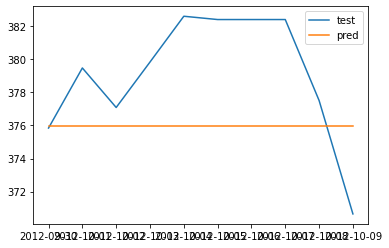

In [19]:
plt.plot(test, label='test')
plt.plot(test.index, preds_lr, label='pred')
plt.legend()

In [10]:
preds_lr

[0.3122295099999988,
 0.18898935000000136,
 0.541270230000005,
 0.4471765599999995,
 0.8790062100000029,
 0.025353570000002035,
 0.30555420000000166,
 0.045678310000003816,
 0.5042086299999999,
 0.1035642700000011]

In [11]:
train[X_cols].iloc[-1].values

array([-0.996276,  1.514312,  2.141999, -0.109589,  7.66626 ,  0.      ,
        0.      ])

In [29]:
dfp_gs = df2.copy().iloc[int(-31*24):]
len(dfp_gs)

744

In [30]:
# GridSearchCV:
# !pip install -U scikit-learn

In [31]:
dfp_gs = df2.copy().iloc[int(-31*24):]

n_lags_gs = 7
n_puntos_test_gs = 12
n_puntos_train_gs = 712
n_puntos_total_gs = n_puntos_train_gs + n_lags_gs + n_puntos_test_gs
dfp_gs = df2.copy().iloc[-n_puntos_total_gs:][['Close']]

# Alternativa (vago):
for i in range(1, n_lags_gs+1):
    dfp_gs[f'lag_{i}'] = dfp_gs['Close'].shift(i)

dfp_gs = dfp_gs.dropna()
train_gs = dfp_gs.reset_index(drop=True)
train_gs;

y_col = 'Close'
X_cols = [col for col in dfp_gs.columns if col != y_col]

In [53]:
# Pipelines:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR


pipe_ab = Pipeline([('model', AdaBoostRegressor())])

pipe_rf = Pipeline([('model', RandomForestRegressor())])

pipe_svr = Pipeline([('model', SVR())])

params_ab = {
    'model__learning_rate': [0.9, 0.99, 1, 2, 5],
    'model__n_estimators': [25, 50, 100, 250, 500],
}

params_rf = {
    'model__oob_score': [True, False],
    'model__n_estimators': [25, 50, 100, 250],
    'model__max_features': ['auto', 'log2', .7, .25]
}

params_svr = {
    'model__kernel': ['linear', 'rbf'],
    'model__C': [0.01, 0.1, 0.5, 1, 10]
}



# time_cv = TimeSeriesSplit(n_splits=20, test_size=n_puntos_test_gs)
time_cv = TimeSeriesSplit(n_splits=20, test_size=1)

grid_ab = GridSearchCV(pipe_ab,
                       params_ab,
                       cv = time_cv,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1,
                       verbose=3)

grid_rf = GridSearchCV(pipe_rf,
                       params_rf,
                       cv = time_cv,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1,
                       verbose=3)

# grid_svr = GridSearchCV(pipe_svr,
#                        params_svr,
#                        cv = time_cv,
#                        scoring='neg_root_mean_squared_error',
#                        n_jobs=-1,
#                        verbose=3)

grids = {'AdaBoost': grid_ab,
        'RandomForest': grid_rf,
#         'SVR': grid_svr
        }

In [54]:
for name, grid in grids.items():
    grid.fit(train_gs[X_cols], train_gs[y_col])

Fitting 20 folds for each of 25 candidates, totalling 500 fits
Fitting 20 folds for each of 32 candidates, totalling 640 fits


In [55]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ['Grid', 'Best score'])
best_grids.sort_values(by='Best score', ascending=False)

,Grid,Best score
1,RandomForest,-6.224307
0,AdaBoost,-7.105364


In [56]:
# grids['RandomForest'].best_estimator_.get_params()

In [57]:
grids['AdaBoost'].best_estimator_.get_params()

{'memory': None,
 'steps': [('model', AdaBoostRegressor(learning_rate=2, n_estimators=500))],
 'verbose': False,
 'model': AdaBoostRegressor(learning_rate=2, n_estimators=500),
 'model__base_estimator': None,
 'model__learning_rate': 2,
 'model__loss': 'linear',
 'model__n_estimators': 500,
 'model__random_state': None}

In [58]:
preds_ab = predice_temp(modelo=grids['AdaBoost'].best_estimator_, train=train_gs, n_puntos=n_puntos_test_gs, X_cols=X_cols, y_col=y_col)
preds_rf = predice_temp(modelo=grids['RandomForest'].best_estimator_, train=train_gs, n_puntos=n_puntos_test_gs, X_cols=X_cols, y_col=y_col)
# preds_svr = predice_temp(modelo=grids['SVR'].best_estimator_, train=train_gs, n_puntos=n_puntos_test_gs, X_cols=X_cols, y_col=y_col)

In [59]:
test_gs = dfp_gs.iloc[n_puntos_train_gs:n_puntos_train_gs+n_puntos_test_gs]['Close']
print(f"RMSE AdaBoost: {mean_squared_error(test_gs, preds_ab)**(1/2)}")
print(f"RMSE RandomForest: {mean_squared_error(test_gs, preds_rf)**(1/2)}")
# print(f"RMSE SVR: {mean_squared_error(test_gs, preds_svr)**(1/2)}")

RMSE AdaBoost: 9.29321553011941
RMSE RandomForest: 9.36750990425486


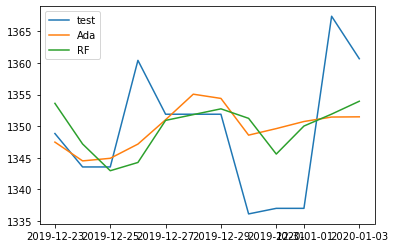

In [60]:
plt.plot(test_gs, label='test')
plt.plot(test_gs.index, preds_ab, label='Ada')
plt.plot(test_gs.index, preds_rf, label='RF')
# plt.plot(test_gs.index, preds_svr, label='SVR')
plt.legend()

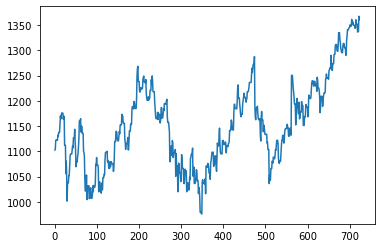

In [618]:
plt.plot(train_gs['Close'])

In [556]:
train_gs['Close']

0      1137.510010
1      1137.510010
2      1155.810059
3      1169.969971
4      1164.239990
          ...     
669    1303.050049
670    1301.349976
671    1295.339966
672    1295.339966
673    1295.339966
Name: Close, Length: 674, dtype: float64

In [33]:
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=12)

In [34]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

tscv = TimeSeriesSplit(n_splits=10, test_size=12, max_train_size=365)
print(tscv)

for train, test in tscv.split(train_gs):
    print("%s %s" % (train, test))

TimeSeriesSplit(gap=0, max_train_size=365, n_splits=10, test_size=12)
[239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346
 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364
 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400
 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 4